# Проект: Обучение с учителем: качество модели.

## Описание проекта.

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


## Ход исследования.

 - Шаг 1. Загрузка данных
 - Шаг 2. Предобработка данных
 - Шаг 3. Исследовательский анализ данных
 - Шаг 4. Объединение таблиц
 - Шаг 5. Корреляционный анализ
 - Шаг 6. Использование пайплайнов
 - Шаг 7. Анализ важности признаков
 - Шаг 8. Сегментация покупателей
 - Шаг 9. Общий вывод.

## Описание данных.

<br>Данные для работы находятся в нескольких таблицах. Нажмите на название файла, чтобы его скачать.
 - **market_file.csv**

<br>Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
<br>**id** — номер покупателя в корпоративной базе данных.
<br>**Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний <br>уровень».
<br> **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт». Зависит от наличия определенной подписки у пользователя.
<br> **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
<br> **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за <br>последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
<br> **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
<br> **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
<br> **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
<br> **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
<br> **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение <br>последнего месяца.
<br> **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
<br> **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.
<br> **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

 - **market_money.csv**
<br> Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
<br> **id** — номер покупателя в корпоративной базе данных.
<br> **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
<br> **Выручка** — сумма выручки за период в условных единицах.
 - **market_time.csv**
<br> Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
<br> **id** — номер покупателя в корпоративной базе данных.
<br> **Период** — название периода, во время которого зафиксировано общее время минут — значение времени, проведённого на сайте, в минутах.
<br>

 - **money.csv**
<br> Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
<br> **id** — номер покупателя в корпоративной базе данных.
<br> **Прибыль** — значение прибыли в условных единицах.

## Шаг 1. Установка библиотек и загрузка данных.

### Установка библиотек.

In [1]:
!pip install --upgrade numba -q

In [2]:
!pip install numpy==1.24.3 -q

In [3]:
!pip install phik -q
!pip install shap -q

In [4]:
!pip install --upgrade scikit-learn -q

In [5]:
!pip install --upgrade matplotlib -q

In [6]:
!pip install --upgrade seaborn -q

### Импорт библиотек.

In [7]:
# Импортируем библиотеки:
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from scipy import stats as st
from phik.report import plot_correlation_matrix
from phik import phik_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler, 
    LabelEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    train_test_split, 
    RandomizedSearchCV, 
    GridSearchCV
)
from sklearn.metrics import (
    roc_auc_score, 
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    accuracy_score, 
    recall_score, 
    precision_score, 
    confusion_matrix
)

from warnings import simplefilter

# Игнорирование предупреждений FutureWarning для чистоты вывода
simplefilter(action='ignore', category=FutureWarning)

# Константа для инициализации генератора случайных чисел
RANDOM_STATE = 42

# Доля данных, выделяемая для тестовой выборки
TEST_SIZE = 0.25

# Установка опций отображения DataFrame в pandas
pd.set_option('display.max_columns', None)  # Отображение всех столбцов
pd.set_option('display.max_rows', None)     # Отображение всех строк
pd.set_option('float_format', '{:.2f}'.format)  # Формат чисел с плавающей точкой: два знака после запятой


### Загрузка данных

In [8]:
# Загрузим данные. Файлы `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv`.
df_market = pd.read_csv('/datasets/market_file.csv')
df_market_money = pd.read_csv('/datasets/market_money.csv')
df_market_time = pd.read_csv('/datasets/market_time.csv')
df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [9]:
# Проверим данные в DataFrame
def analyze_dataframe(df, name=""):
    if name:
        print(f"Анализ данных: {name}\n{'='*30}")
    print("Информация о DataFrame:")
    df.info()
    print("\nПервые 5 строк DataFrame:")
    display(df.head())
    print("\nОписательная статистика DataFrame:")
    display(df.describe().T)

In [10]:
analyze_dataframe(df_market, name="df_market")

Анализ данных: df_market
Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-n

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2



Описательная статистика DataFrame:


,count,mean,std,min,25%,50%,75%,max
id,1300.00,215997.50,375.42,215348.00,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.00,4.25,1.01,0.90,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.00,4.01,0.70,3.00,4.00,4.00,4.00,5.00
Длительность,1300.00,601.90,249.86,110.00,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.00,0.32,0.25,0.00,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.00,3.27,1.36,1.00,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.00,2.84,1.97,0.00,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.00,4.19,1.96,0.00,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.00,8.18,3.98,1.00,5.00,8.00,11.00,20.00


**Вывод по обзору данных `df_market`:**

<span style="color:#800080;">✓</span> Столбцы соответствуют описанию.
<br>
<span style="color:#800080;">✓</span> Явных пропусков не наблюдается.
<br>
<span style="color:#800080;">✓</span> Название столбцов оставим кириллицей, но приведем к единому "змеиному" стилю.
<br>
<span style="color:#800080;">✓</span> Формат данных соответствует.
<br>
<span style="color:#800080;">✓</span> В "Тип сервиса" есть опечатка в категории "стандартт" - исправим это в предобработке.

In [11]:
# Посмотрим данные
analyze_dataframe(df_market_money, name="df_market_money")

Анализ данных: df_market_money
Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB

Первые 5 строк DataFrame:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,3293.10
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,4472.00
4,215349,текущий_месяц,4971.60



Описательная статистика DataFrame:


,count,mean,std,min,25%,50%,75%,max
id,3900.00,215997.50,375.33,215348.00,215672.75,215997.50,216322.25,216647.00
Выручка,3900.00,5025.70,1777.70,0.00,4590.15,4957.50,5363.00,106862.20


**Вывод по обзору данных `market_money`:**

<span style="color:#800080;">✓</span> Столбцы соответствуют описанию.
<br>
<span style="color:#800080;">✓</span> Явных пропусков не наблюдается.
<br>
<span style="color:#800080;">✓</span> Название столбцов оставим кириллицей, но приведем к единому "змеиному" стилю.
<br>
<span style="color:#800080;">✓</span> Формат данных соответствует.
<br>
<span style="color:#800080;">✓</span> Видим, что есть выручка с показателем 0 и максимальная выручка 106862.2 тоже выглядит подозрительно, проверим показатель в исследовательском анализе.

In [12]:
# Посмотрим данные)
analyze_dataframe(df_market_time, name="df_market_time")

Анализ данных: df_market_time
Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB

Первые 5 строк DataFrame:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



Описательная статистика DataFrame:


,count,mean,std,min,25%,50%,75%,max
id,2600.00,215997.50,375.35,215348.00,215672.75,215997.50,216322.25,216647.00
минут,2600.00,13.34,4.08,4.00,10.00,13.00,16.00,23.00


**Вывод по обзору данных `df_market_time`:**

<span style="color:#800080;">✓</span> Столбцы соответствуют описанию.
<br>
<span style="color:#800080;">✓</span> Явных пропусков не наблюдается.
<br>
<span style="color:#800080;">✓</span> Название столбцов оставим кириллицей, но приведем к единому "змеиному" стилю.
<br>
<span style="color:#800080;">✓</span> Формат данных соответствует.
<br>
<span style="color:#800080;">✓</span> В столбце "Период" есть опечатка в категории "предыдцщий_месяц " - исправим это в предобработке.

In [13]:
# Посмотрим данные
analyze_dataframe(df_money, name="df_money")

Анализ данных: df_money
Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB

Первые 5 строк DataFrame:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21



Описательная статистика DataFrame:


,count,mean,std,min,25%,50%,75%,max
id,1300.00,215997.50,375.42,215348.00,215672.75,215997.50,216322.25,216647.00
Прибыль,1300.00,4.00,1.01,0.86,3.30,4.04,4.67,7.43


**Вывод по обзору данных `df_money`:**

<span style="color:#800080;">✓</span> Столбцы соответствуют описанию.
<br>
<span style="color:#800080;">✓</span> Явных пропусков не наблюдается.
<br>
<span style="color:#800080;">✓</span> Название столбцов оставим кириллицей, но приведем к единому "змеиному" стилю.
<br>
<span style="color:#800080;">✓</span> Формат данных соответствует.

### **Вывод по загрузке данных**

Данные в целом соответствуют описанию и пригодны для дальнейшего анализа. Во всех четырех файлах: df_market, df_market_money, df_market_time и df_money столбцы соответствуют описанию, не обнаружено явных пропусков, и формат данных в целом корректен.

**Требуется предобработка данных:**

Наименование столбцов:
                                                                                                                             Необходимо привести названия столбцов всех четырех таблиц к единому "змеиному" стилю.
Опечатки:В таблицах df_market и df_market_time были обнаружены опечатки в категориях "Тип сервиса" ( стандартт ) и "Период" ( предыдцщий_месяц ), которые необходимо исправить.

Аномальные значения:В таблице df_market_money обнаружена нулевая выручка и подозрительно большая максимальная выручка, которые требуют проверки и анализа в рамках исследовательского анализа данных.

## Шаг 2. Предобработка данных

### df_market

In [14]:
df_market.info()
print(f'\nКоличество повторов {df_market.duplicated().sum()}')
df_market.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [15]:
# Посмотрим уникальные значения и не явные дубликаты
print(f'Уникальные покупательские активности: \n{df_market["Покупательская активность"].unique()}')
print(f'Уникальные типы сервиса: \n{df_market["Тип сервиса"].unique()}')
print(f'Уникальные значения флага "Разрешить сообщать": \n{df_market["Разрешить сообщать"].unique()}')
print(f'Уникальные категории: \n{df_market["Популярная_категория"].unique()}')

Уникальные покупательские активности: 
['Снизилась' 'Прежний уровень']
Уникальные типы сервиса: 
['премиум' 'стандартт' 'стандарт']
Уникальные значения флага "Разрешить сообщать": 
['да' 'нет']
Уникальные категории: 
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [16]:
# Исправим опечатку в 'Косметика и аксесуары'
df_market["Популярная_категория"] = (df_market["Популярная_категория"].str.replace('Косметика и аксесуары', 'Косметика и аксессуары'))

In [17]:
# Проверим исправление опечатки.
print(f'Уникальные категории: \n{df_market["Популярная_категория"].unique()}')

Уникальные категории: 
['Товары для детей' 'Домашний текстиль' 'Косметика и аксессуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [18]:
# Исправим не явные дубликаты
df_market["Тип сервиса"] = (df_market["Тип сервиса"].str.replace('стандартт', 'стандарт'))

In [19]:
# Проверим исправление.
print(f'Уникальные типы сервиса: \n{df_market["Тип сервиса"].unique()}')

Уникальные типы сервиса: 
['премиум' 'стандарт']


In [20]:
# Приводим к стандарту назвыание столбцов
df_market.columns = df_market.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')

In [21]:
# Проверим столбцы.
df_market.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [22]:
# Для дальнейшей работы проверим на наличие повторов по полю `id`.
print(f'\nКоличество повторов id {df_market.duplicated(subset=["id"]).sum()}')


Количество повторов id 0


In [23]:
# Устанавливаем указанный столбец "id" в качестве индекс.
df_market.set_index("id", inplace=True)

### df_market_money

In [24]:
df_market_money.info()
print(f'\nКоличество повторов {df_market_money.duplicated().sum()}')
df_market_money.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB

Количество повторов 0


id         0
Период     0
Выручка    0
dtype: int64

In [25]:
# Посмотрим уникальные значения и не явные дубликаты
print(f'Уникальные периоды: \n{df_market_money["Период"].unique()}')

Уникальные периоды: 
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [26]:
# Проверим на наличие повторов в полях `id`, `Период`.
print(f'\nКоличество повторов id / Период {df_market_money.duplicated(subset=["id", "Период"]).sum()}')


Количество повторов id / Период 0


In [27]:
# Проверим на наличие нескольких значений за один период у одного пользователя. 
df_market_money.groupby(["id", "Период"]).filter(lambda x: len(x) > 1)

,id,Период,Выручка


Нескольких значений за один период у одного пользователя - нет.

In [28]:
# Приводим к стандарту назвыание столбцов
df_market_money.columns = df_market_money.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')

In [29]:
# Проверим столбцы.
df_market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

### df_market_time

In [30]:
df_market_time.info()
print(f'\nКоличество повторов {df_market_time.duplicated().sum()}')
df_market_time.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB

Количество повторов 0


id        0
Период    0
минут     0
dtype: int64

In [31]:
# Посмотрим уникальные значения и не явные дубликаты
print(f'Уникальные периоды: \n{df_market_time["Период"].unique()}')

Уникальные периоды: 
['текущий_месяц' 'предыдцщий_месяц']


In [32]:
# Исправим опечатку
df_market_time["Период"] = df_market_time["Период"].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

In [33]:
# Проверим на наличие повторов в полях `id`, `Период`.
print(f'\nКоличество повторов id / Период {df_market_time.duplicated(subset=["id", "Период"]).sum()}')


Количество повторов id / Период 0


In [34]:
# Проверим на наличие нескольких значений за один период у одного пользователя. 
df_market_time.groupby(["id", "Период"]).filter(lambda x: len(x) > 1)

,id,Период,минут


Нескольких значений за один период у одного пользователя - нет.

In [35]:
# Приводим к стандарту назвыание столбцов
df_market_time.columns = df_market_time.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')

In [36]:
# Проверим столбцы.
df_market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

### df_money

In [37]:
df_money.info()
print(f'\nКоличество повторов {df_money.duplicated().sum()}')
df_money.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB

Количество повторов 0


id         0
Прибыль    0
dtype: int64

In [38]:
# Приводим к стандарту назвыание столбцов
df_money.columns = df_money.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')

In [39]:
# Проверим столбцы.
df_money.columns

Index(['id', 'прибыль'], dtype='object')

### **Вывод по предобработке данных**

<span style="color:#800080;">✓</span> После проведения предобработки данных, можно отметить, что данные готовы к дальнейшей работе. 

<span style="color:#800080;">✓</span>Обработка отдельных столбцов завершена, что облегчает работу с информацией.

<span style="color:#800080;">✓</span> Результаты предобработки:
Явных дубликатов во всех четырех датафреймах (df_market, df_market_money, df_market_time и df_money) не обнаружено.

<span style="color:#800080;">✓</span> Опечатки:в наборах данных df_market и df_market_time были обнаружены и исправлены опечатки в столбцах 'тип_сервиса', 'популярная_категория' и 'период' соответственно.


## Шаг 3. Исследовательский анализ данных

Проведём исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

###  Напишем функцию.

In [40]:
# Построим гистограммы.
def plot_distribution(data, discrete_threshold=20):
    num_col = data.select_dtypes(include='number').columns.to_list()
    cat_col = data.select_dtypes(exclude='number').columns.to_list()

    for clm in num_col:
        unique_vals = data[clm].nunique()
        if unique_vals <= discrete_threshold:
            # Дискретный количественный признак — строим countplot
            plt.figure(figsize=(8, 5))
            order = data[clm].value_counts(ascending=True).index
            ax = sns.countplot(y=clm, data=data, order=order, palette='pastel')
            plt.xlabel('Частота', fontsize=10)
            plt.ylabel(clm, fontsize=10)
            plt.title(f'Распределение дискретного признака {clm}', fontsize=12)

            for p in ax.patches:
                width = p.get_width()
                if width > 0:
                    ax.annotate(f'{int(width)}', 
                                (width, p.get_y() + p.get_height() / 2),
                                ha='left', va='center', fontsize=9)

            plt.tight_layout()
            plt.show()
        else:
            # Непрерывный признак — строим гистограмму и boxplot
            fig, axis = plt.subplots(1, 2, figsize=(14, 6))

            sns.histplot(data[clm], bins=25, kde=False, ax=axis[0], color='skyblue', alpha=0.7)
            axis[0].axvline(x=data[clm].median(), color='b', linestyle='--', label='Медиана')
            axis[0].axvline(x=data[clm].mean(), color='r', linestyle='--', label='Среднее')
            axis[0].set_xlabel(f'Значение {clm}', fontsize=10)
            axis[0].set_ylabel('Частота', fontsize=10)
            axis[0].set_title(f'Распределение столбца {clm}', fontsize=12)
            axis[0].legend(fontsize=9)

            for p in axis[0].patches:
                height = p.get_height()
                if height > 0:
                    axis[0].annotate(f'{int(height)}', 
                                     (p.get_x() + p.get_width() / 2, height),
                                     ha='center', va='bottom', fontsize=9)

            sns.boxplot(x=data[clm], ax=axis[1], color='lightgreen')
            axis[1].set_xlabel(f'Значение {clm}', fontsize=10)
            axis[1].set_title(f'Диаграмма размаха столбца {clm}', fontsize=12)

            plt.tight_layout()
            plt.show()

    # Категориальные признаки без изменений
    for clm in cat_col:
        plt.figure(figsize=(8, 5))
        order = data[clm].value_counts(ascending=True).index
        ax = sns.countplot(y=clm, data=data, order=order, palette='pastel')
        plt.xlabel('Частота', fontsize=10)
        plt.ylabel(clm, fontsize=10)
        plt.title(f'Распределение столбца {clm}', fontsize=12)

        for p in ax.patches:
            width = p.get_width()
            if width > 0:
                ax.annotate(f'{int(width)}', 
                            (width, p.get_y() + p.get_height() / 2),
                            ha='left', va='center', fontsize=9)

        plt.tight_layout()
        plt.show()

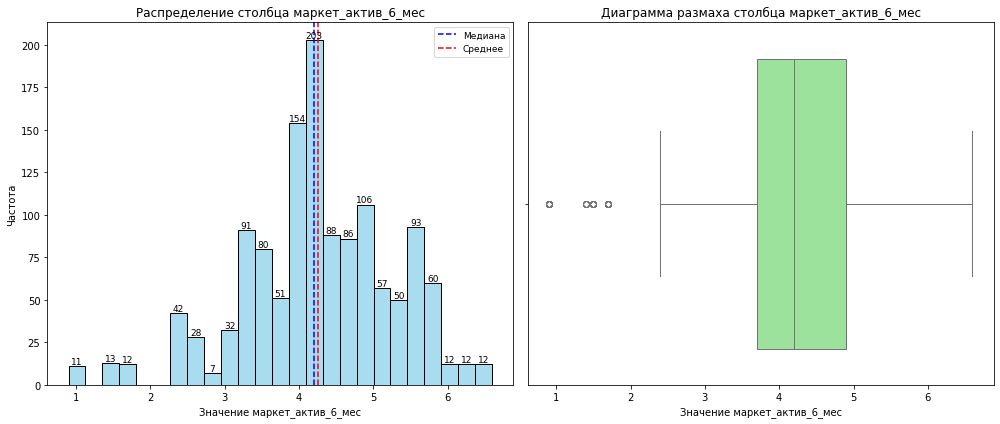

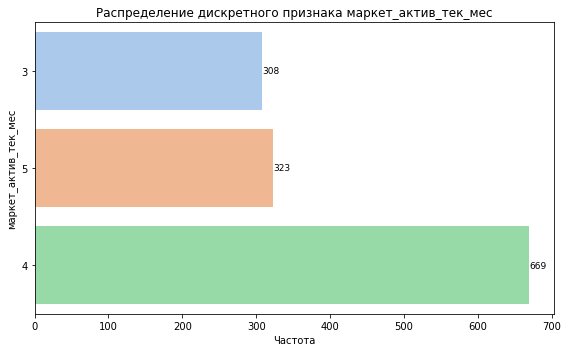

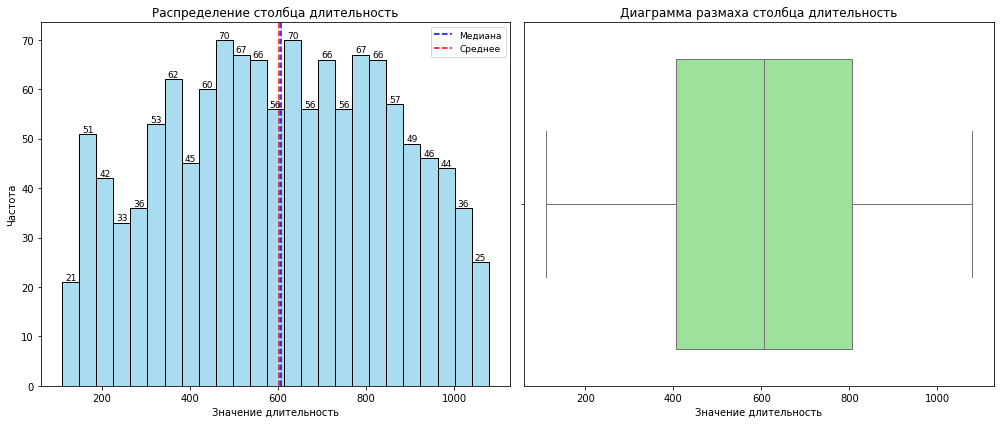

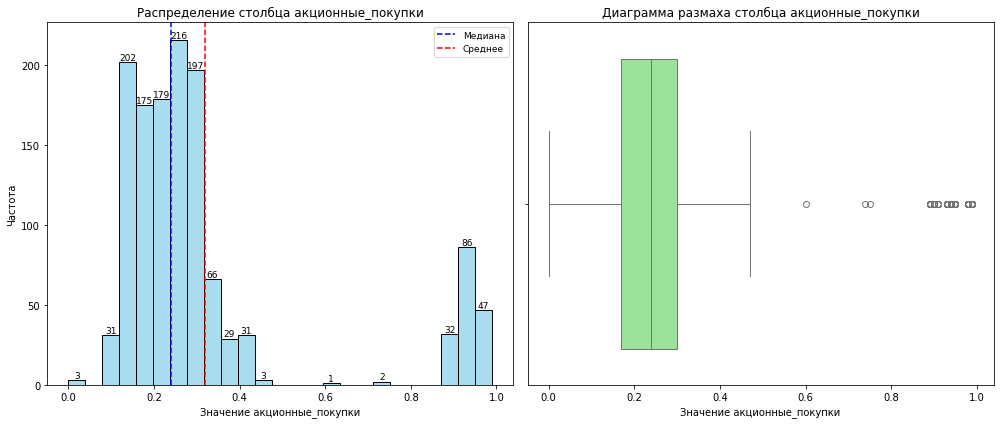

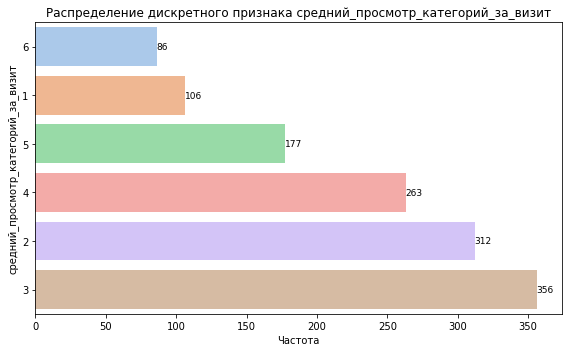

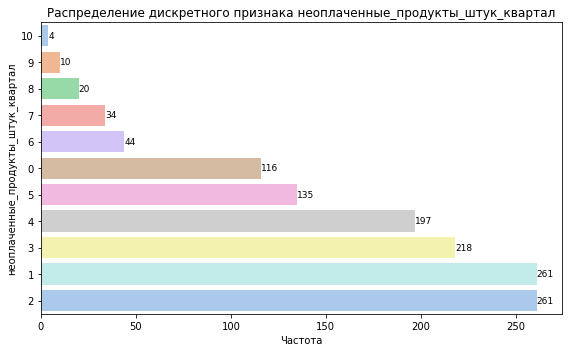

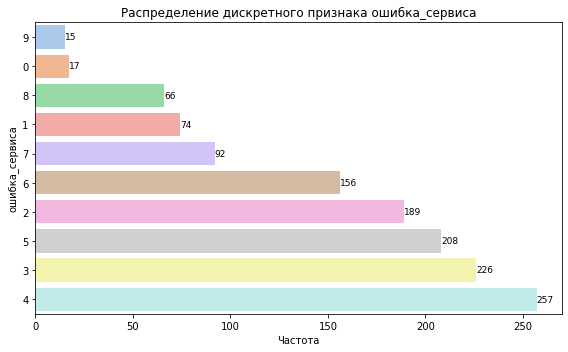

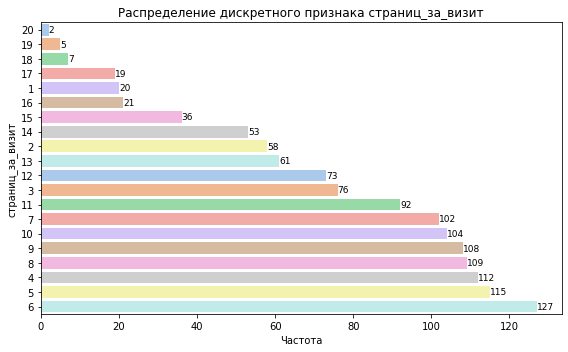

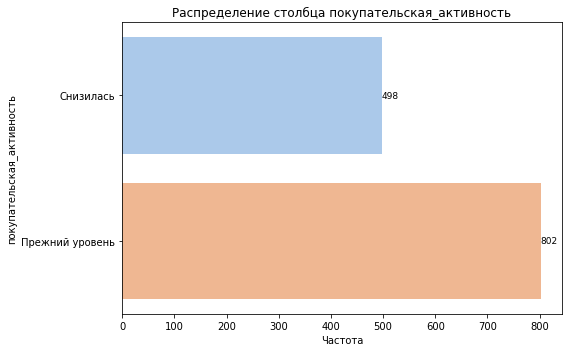

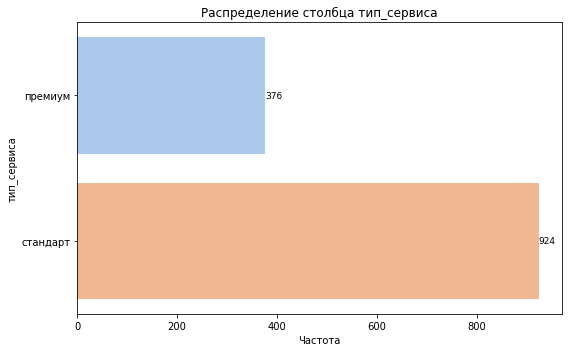

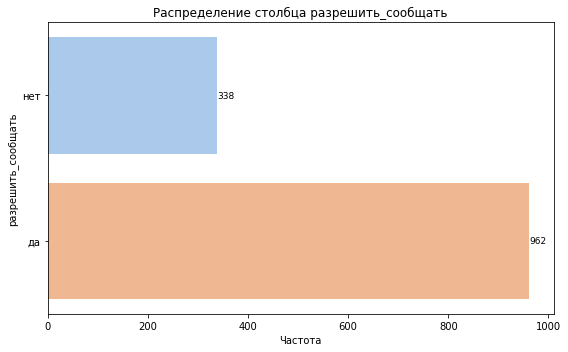

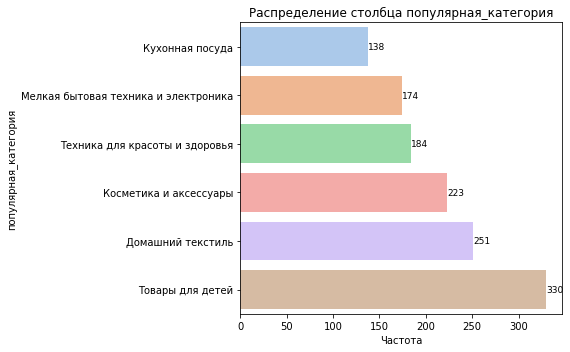

In [41]:
plot_distribution(df_market)

### df_market

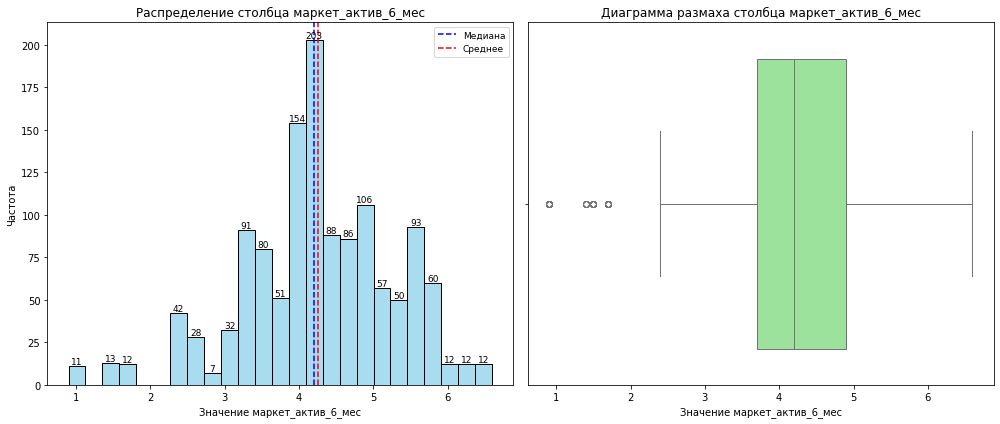

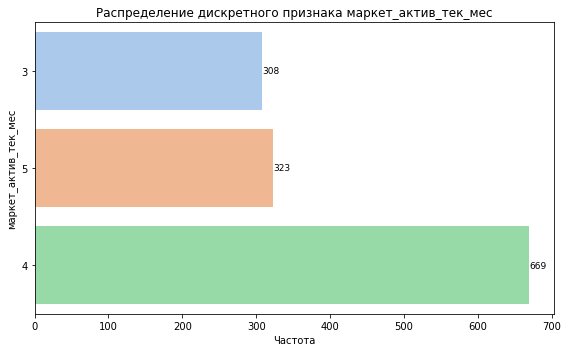

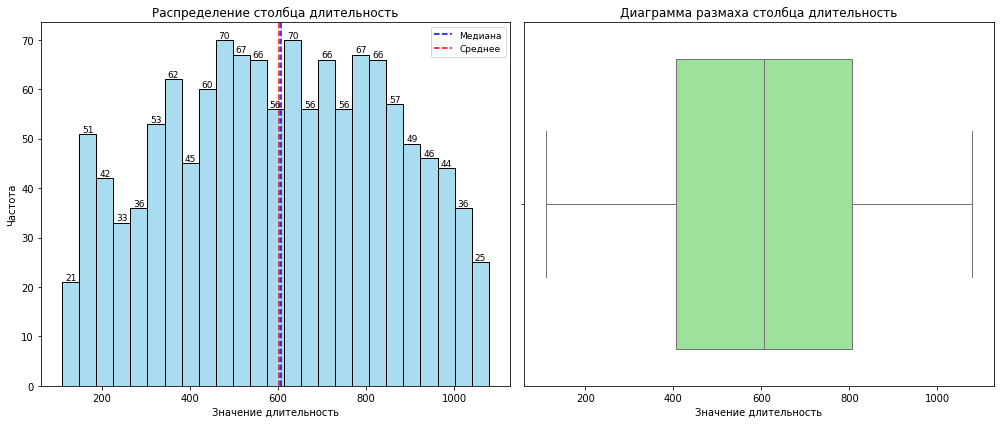

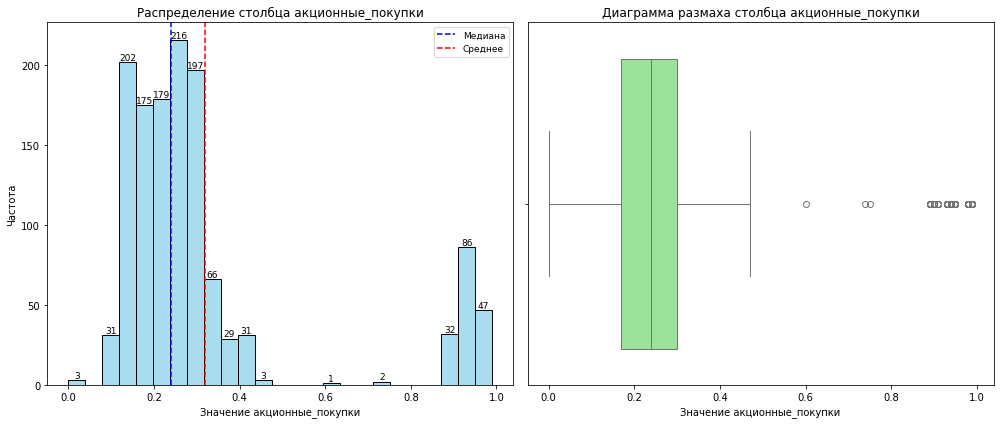

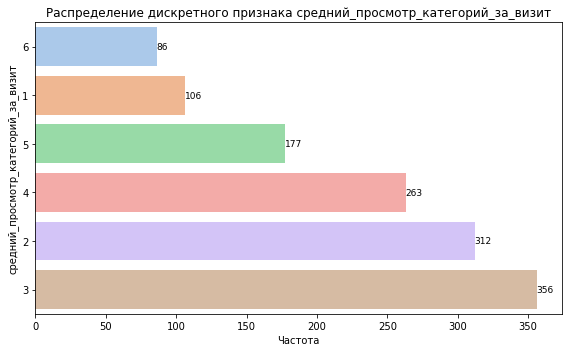

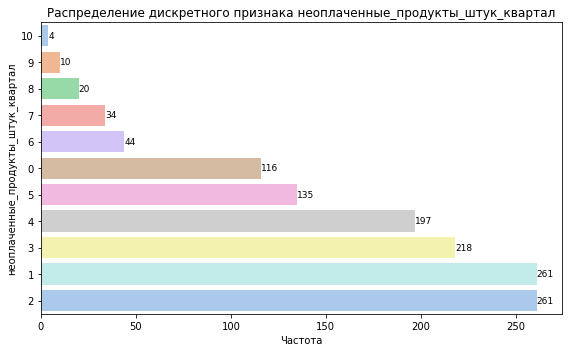

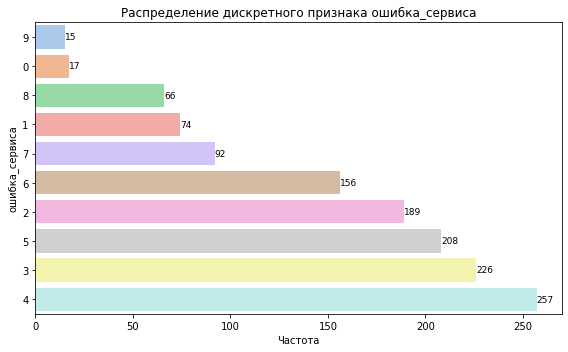

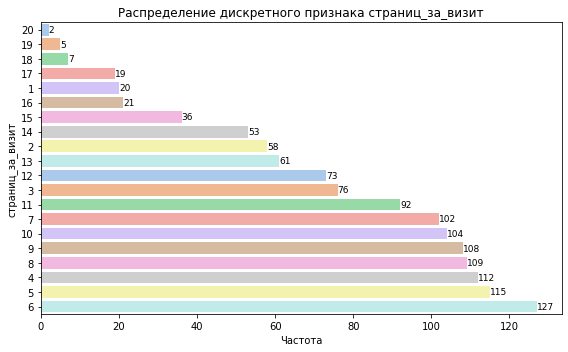

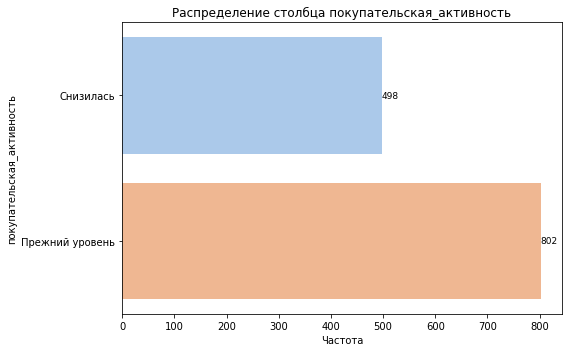

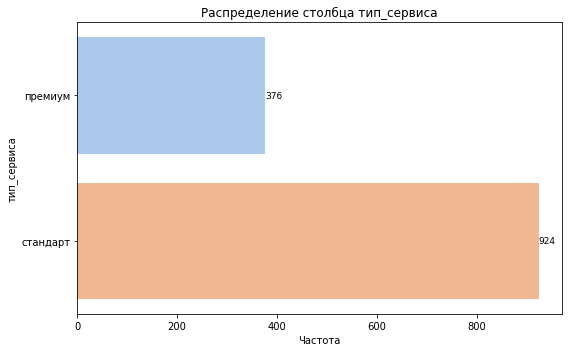

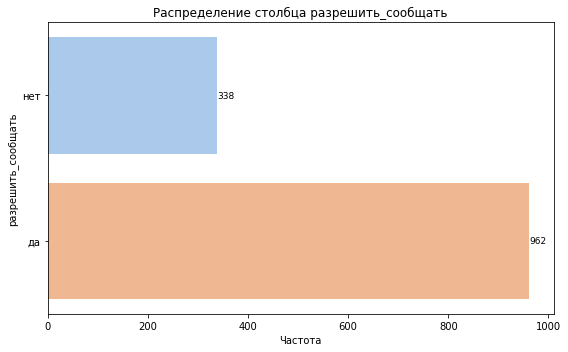

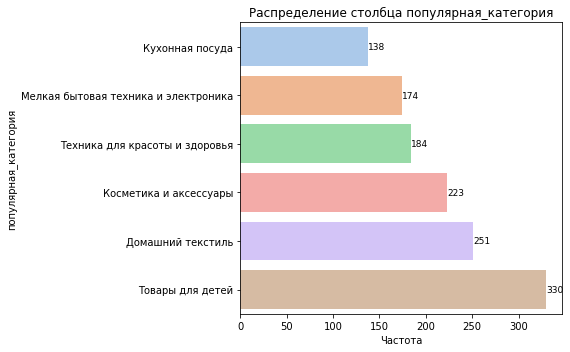

In [42]:
plot_distribution(df_market)

Стоит обратить внимание на распределение категориальных признаков. Легко заметить, что они распределены не равномерно, на примере целевого признака видно, что основная масса пользователей сохранили покупательскую активность на прежнем уровне. Самыми популярными товарами являются товары` Товары для детей` / `Домашний текстиль`. 

Так же стоит обратить внимание на то, что некоторые числовые признаки имеют близкий к категориальному характер. Так, например, столбцы `ошибка_сервиса` стремиться к нормальному распределению, однако значения не дискретен и их можно уложить в перечень категорий по количеству ошибок. На данный момент оставим столбцы без изменений. Особых выбросов нету. 

### df_market_money

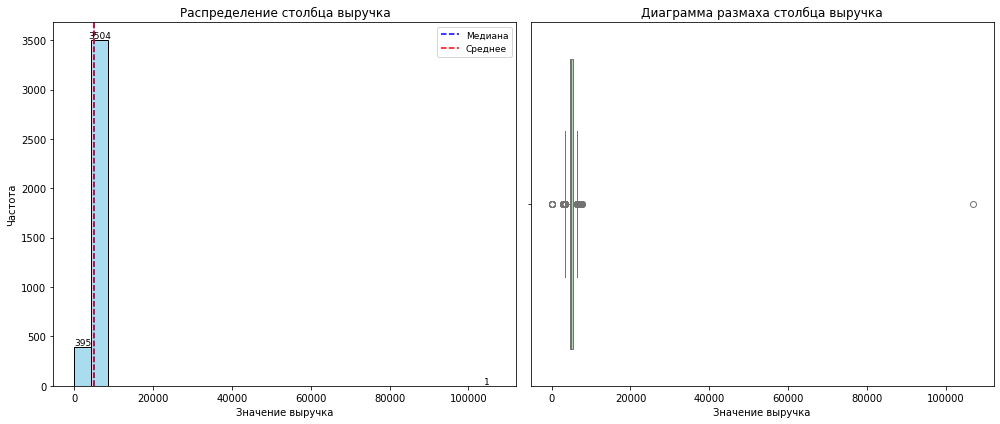

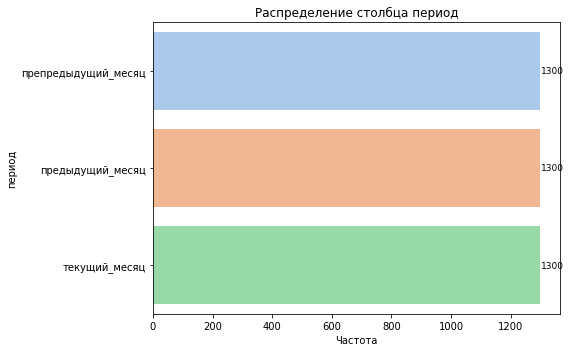

In [43]:
plot_distribution(df_market_money[['период', 'выручка']])

Столбце ` выручка` имеет характерный большой выброс, проверим его.

In [44]:
# Выбираем все строки, где значение в столбце выручка больше или равно 80 000.
df_market_money.query('выручка >= 80000')

,id,период,выручка
98,215380,текущий_месяц,106862.20


In [45]:
# Посмотрим более детально информацию о данном выбросе.
df_market.query('id == 215380')

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
id,,,,,,,,,,,,
215380,Снизилась,премиум,нет,1.70,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


In [46]:
# Посмотрим более детально информацию о данном выбросе.
df_market_time.query('id == 215380')

,id,период,минут
64,215380,предыдущий_месяц,12
65,215380,текущий_месяц,14


In [47]:
# Посмотрим более детально информацию о данном выбросе.
df_money.query('id == 215380')

,id,прибыль
32,215380,3.88


С учетом прибыли, который принёс клиент ранее и других показателей (малое время в текущем периоде, снижение покупательской активности и т.д.), можно сделать вывод что это явный выброс. Уберем его.

In [48]:
# Отфильтруем выброс 215380
df_market_money = df_market_money.query('id != 215380')

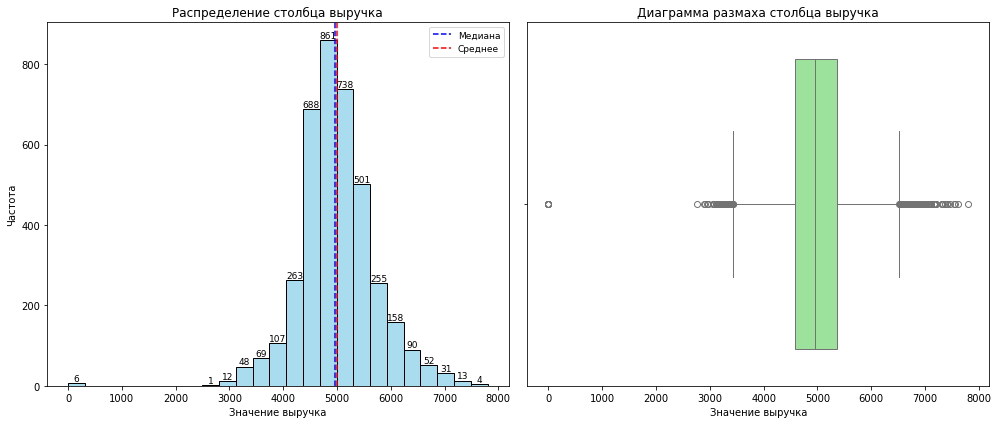

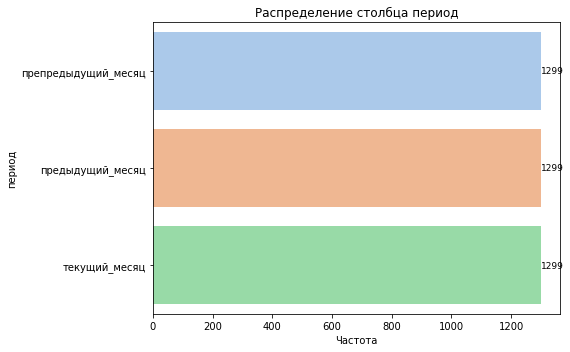

In [49]:
plot_distribution(df_market_money[['период', 'выручка']])

In [50]:
# Выбираем все строки, где значение в столбце выручка меньше 2000.
df_market_money.query('выручка < 2000')

,id,период,выручка
0,215348,препредыдущий_месяц,0.00
2,215348,предыдущий_месяц,0.00
28,215357,препредыдущий_месяц,0.00
29,215357,предыдущий_месяц,0.00
34,215359,предыдущий_месяц,0.00
35,215359,препредыдущий_месяц,0.00


Так же уберем клиентов, которые не делали покупки за последние 3-и месяца (чья выручка равна 0).

In [51]:
# Удалим записи где выручка 0
ids_to_remove = [215348, 215359, 215357, 215380]
df_market_money = df_market_money[~df_market_money['id'].isin(ids_to_remove)]
df_market_time = df_market_time[~df_market_time['id'].isin(ids_to_remove)]
df_money = df_money[~df_money['id'].isin(ids_to_remove)]

In [52]:
# Проверим удаление
ids_to_check = [215348, 215359, 215357]
print("Количество записей с указанными id:", df_market_money['id'].isin(ids_to_check).sum())
print("Количество записей с указанными id:", df_market_time['id'].isin(ids_to_check).sum())
print("Количество записей с указанными id:", df_money['id'].isin(ids_to_check).sum())

Количество записей с указанными id: 0
Количество записей с указанными id: 0
Количество записей с указанными id: 0


**Вывод по отбору клиентов**

Во всех датафреймах были удалены пользователи (id: 215348, 215357, 215359), которые за последние 3 месяца хотя бы в одном месяце не принесли выручку.

In [53]:
df_market_money = df_market_money.query('выручка > 2000')

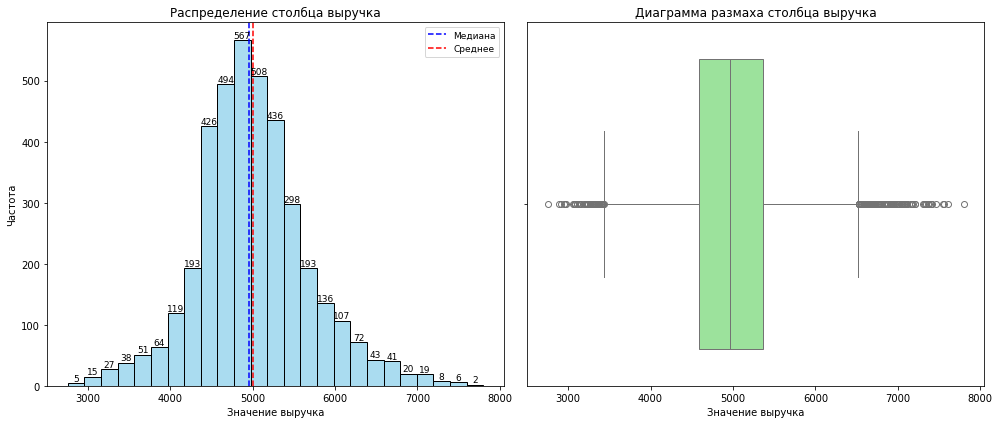

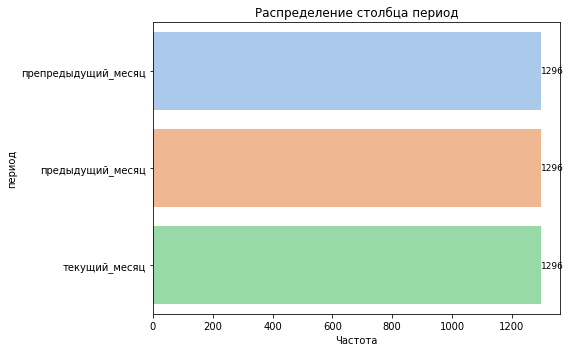

In [54]:
plot_distribution(df_market_money[['период', 'выручка']])

Теперь график распределения выглядит нормально, без явных выбросов. 

Сводная таблица:
                           sum
период                        
препредыдущий_месяц 6267718.00
предыдущий_месяц    6411920.00
текущий_месяц       6788572.00


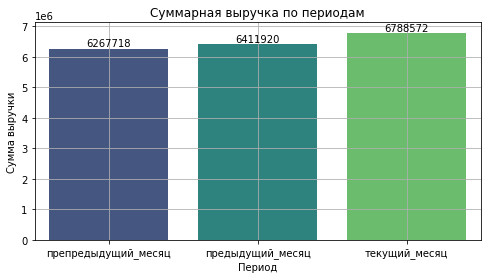

In [55]:
pivot_table = df_market_money.groupby('период')['выручка'].agg(['sum'])
pivot_table = pivot_table.round(0)
pivot_table = pivot_table.sort_values(by='sum', ascending=True)

print("Сводная таблица:")
print(pivot_table)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=pivot_table.index, y=pivot_table['sum'], palette="viridis")
plt.xlabel('Период')
plt.ylabel('Сумма выручки')
plt.title('Суммарная выручка по периодам')
plt.grid(True)

# Добавление аннотаций с числовыми значениями над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

**Выручка**

| **Аспект**                     | **Описание**                                                                                                                                                                                           |
|------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Распределение выручки**     |  Распределение выручки имеет унимодальную форму с пиком в районе 4000-6000, наблюдается заметный "хвост" в сторону более высоких значений. Выбросы практически отсутствуют.                                |
| **Сводная таблица**           |  Суммарная выручка за "текущий_месяц" наибольшая (6 802 587), за "предыдущий_месяц" - 6 417 996, а за "препредыдущий_месяц" - 6 272 769.                                                            |
| **Суммарная выручка по периодам** |  Суммарная выручка демонстрирует рост от "предыдущий_месяц" до "текущий_месяц". При этом "препредыдущий_месяц" показывает самые низкие значения. Разница между периодами не столь значительна, но восходящая тенденция все же имеется. |
| **Количество строк**           |  Изначально было в market_money 3900 строк, после фильтрации осталось 3893 строк, удалено 7 строк с выручкой 0 и более 100.000.                                                                      |

### df_market_time

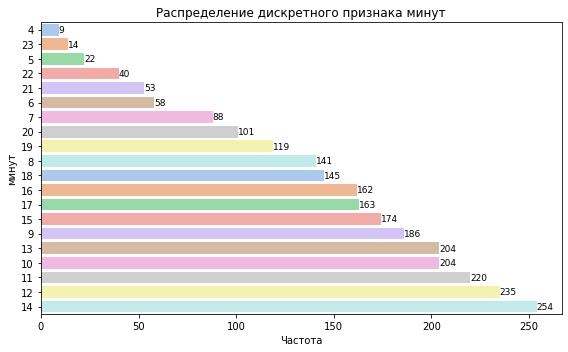

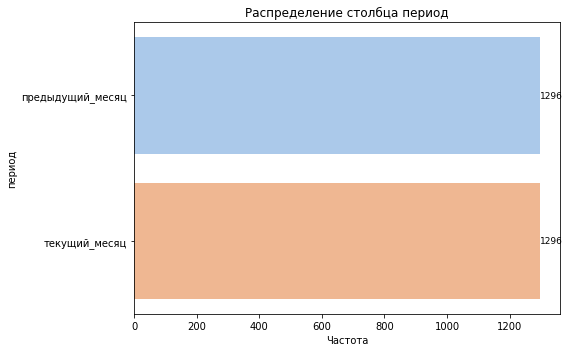

In [56]:
plot_distribution(df_market_time[['период', 'минут']])

Сводная таблица:
                    sum
период                 
текущий_месяц     17121
предыдущий_месяц  17458


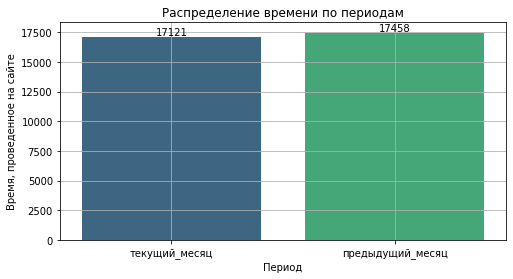

In [57]:
pivot_table = df_market_time.groupby('период')['минут'].agg(['sum'])
pivot_table = pivot_table.round(0)
pivot_table = pivot_table.sort_values(by='sum', ascending=True)

print("Сводная таблица:")
print(pivot_table)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=pivot_table.index, y=pivot_table['sum'], palette="viridis")
plt.xlabel('Период')
plt.ylabel('Время, проведенное на сайте')
plt.title('Распределение времени по периодам')
plt.grid(True)

# Добавление аннотаций с числовыми значениями над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

**Время, проведенное на сайте**

| **Аспект**                  | **Описание**                                                                                                                                                               |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Распределение времени**   |  Распределение времени, проведенного на сайте, имеет унимодальную форму, близкую к нормальному, с пиком в районе 13-16 единиц времени. Ящик с усами также показывает медиану около 13. |
| **Сводная таблица**        |  Суммарное время, проведенное на сайте, за "текущий_месяц" составляет 17121, а за "предыдущий_месяц" - 17458.                                                              |
| **Суммарное время по периодам** |  Суммарное время, проведенное на сайте, демонстрирует небольшое снижение от "предыдущий_месяц" до "текущий_месяц". Разница между периодами минимальна.                                   |

### df_money

**Распределение прибыли**

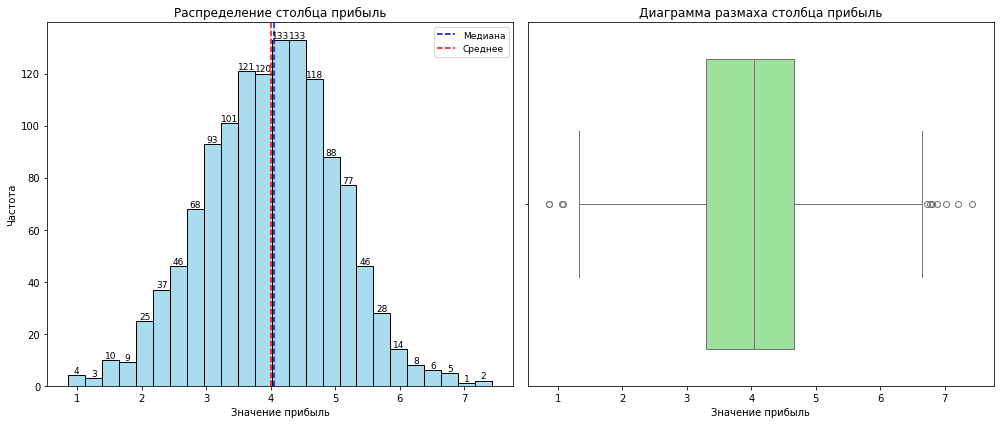

In [58]:
plot_distribution(df_money[['прибыль']])

**Распределение прибыли**

| **Аспект**            | **Описание**                                                                                                                                    |
|-----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------|
| **Распределение прибыли** |  График гистограммы показывает, что распределение прибыли является нормальным с пиком около 4.                                                   |
| **Медиана**           |  На графике ящика с усами видно, что медиана распределения находится около 4, что соответствует пику гистограммы.                                   |
| **Выбросы**            |  Также на ящике с усами видно, что имеются выбросы (отдельные точки за пределами усов) - несколько данных о прибыли превышают 7.                   |
| **Межквартильный размах**|  Межквартильный размах относительно невелик, что указывает на небольшое различие в прибыли между центральной частью данных.                 |

### **Вывод:**

<span style="color:#800080;">✓</span> В рамках проведенного исследования были выявлены значения, которые явно выбивались на общем фоне: слишком большое значение выручки для пользователя с номером `215380`, отсутствие выручки для некоторых пользователей за последние три месяца. От всего этого мы избавились, чтобы значения не помешали в дальнейшем анализе. 

## Шаг 4. Объединение таблиц

Для продолжения анализа нам нужно объединить имеющиеся таблицы.   
Перед этим, в таблицу с данными о минутах мы добавим столбцы ‘минуты_предыдущий_месяц’ и ‘минуты_текущий_месяц’. В таблицу с выручкой - столбцы ‘выручка_препредыдущий_месяц’,‘выручка_предыдущий_месяц’ и ‘выручка_текущий_месяц’.

In [59]:
time_table = df_market_time.pivot_table(index=['id'],columns=['период'],values=['минут'])
time_table.columns = ['минуты_предыдущий_месяц','минуты_текущий_месяц']
time_table = time_table.reset_index()
time_table.head()

,id,минуты_предыдущий_месяц,минуты_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


In [60]:
money_table = df_market_money.pivot_table(index=['id'],columns=['период'],values=['выручка'])
money_table.columns = ['выручка_предыдущий_месяц','выручка_препредыдущий_месяц','выручка_текущий_месяц']
money_table = money_table.reset_index()
money_table.head()

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.00,4472.00,4971.60
1,215350,5457.50,4826.00,5058.40
2,215351,6158.00,4793.00,6610.40
3,215352,5807.50,4594.00,5872.50
4,215353,4738.50,5124.00,5388.50


In [61]:
# Если 'id' в df_market — индекс, сбрасываем его в столбец
df_market.reset_index(inplace=True)

# Объединяем таблицы по 'id'
data = df_market.merge(time_table, on='id', how='inner').merge(money_table, on='id', how='inner')

display(data.head())
data.info()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.00,4472.00,4971.60
1,215350,Снизилась,стандарт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.50,4826.00,5058.40
2,215351,Снизилась,стандарт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.00,4793.00,6610.40
3,215352,Снизилась,стандарт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.50,4594.00,5872.50
4,215353,Снизилась,стандарт,да,3.30,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.50,5124.00,5388.50


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

In [62]:
# Проверим на дубликаты
data.duplicated().sum()

0

In [63]:
# Посмотрим максимальное значение в столбце выручка_текущий_месяц
data.выручка_текущий_месяц.max()

7799.4

### **Вывод**

**Вывод по подготовке и объединению данных.**
<br>Данные успешно преобразованы и объединены в единый DataFrame data, готовый для дальнейшего анализа.
<br> **Основные этапы:**
<br>Создание таблиц time_table и money_table
<br>Сводные таблицы созданы из market_time и market_money, содержащие данные о минутах и выручке за разные периоды.
<br>Столбцы переименованы в минуты_предыдущий_месяц>, минуты_текущий_месяц и выручка_предыдущий_месяц, <br>выручка_препредыдущий_месяц, выручка_текущий_месяц.
<br>**Объединение таблиц:**
<br>Таблицы объединены в data с помощью merge по столбцу id (inner join).
<br>В результирующем DataFrame dataостались только записи, присутствующие во всех трех таблицах.
<br>**Результат:**
<br>DataFrame data содержит 1296 записей и 18 столбцов.
<br>Каждая строка представляет пользователя с данными о его поведении, времени на сайте и выручке.
<br> **Общий итог:**
<br>DataFrame data теперь содержит все необходимые данные в структурированном формате и готов к дальнейшему анализу. 
<br>Процесс объединения проведен корректно, что обеспечивает целостность и готовность данных к следующим этапам.

## Шаг 5. Корреляционный анализ

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


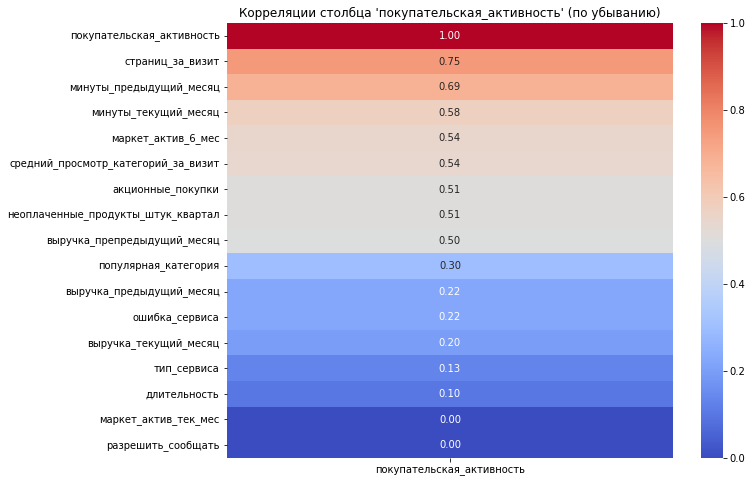

In [64]:
id_column = None
if 'id' in data.columns:
    id_column = data['id'].copy()
    data = data.drop('id', axis=1)

phik_matrix = data.phik_matrix()

if id_column is not None:
    data['id'] = id_column

if "покупательская_активность" in phik_matrix.columns:
    correlation_column = phik_matrix[["покупательская_активность"]]
    sorted_correlation = correlation_column.sort_values(by="покупательская_активность", ascending=False)
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_correlation, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Корреляции столбца 'покупательская_активность' (по убыванию)")
    plt.show()
else:
    print("Столбец 'покупательская_активность' отсутствует в матрице корреляции.")

#### **Выводы на основании матрицы корреляции:**



**Сильная положительная корреляция (0.5 и выше):**

- **Количество страниц за визит (0.75)**: Чем больше страниц посещает пользователь за один визит, тем выше его покупательская активность.
- **Минуты предыдущий месяц (0.69) и минуты текущий месяц (0.58)**: Время, проведенное на сайте в предыдущем и текущем месяцах, также сильно коррелирует с покупательской активностью.
- **Маркетинговая активность за 6 месяцев (0.55)**: Похоже, что маркетинговые усилия, предпринятые за последние полгода, положительно влияют на покупательскую активность.
- **Средний просмотр категорий за визит (0.54)**: Пользователи, просматривающие большее количество категорий за визит, более склонны к активным покупкам.
- **Акционные покупки (0.51)**: Наличие акционных покупок тесно связано с общей покупательской активностью. Вероятно, скидки и акции стимулируют покупателей.
- **Неоплаченные продукты (0.50)**: Удивительно, но наличие неоплаченных продуктов также коррелирует с покупательской активностью. Возможно, это связано с тем, что покупатели добавляют товары в корзину, но не всегда завершают покупку, тем не менее остаются активными.
- **Выручка за предпредыдущий месяц (0.50)**: Доход от покупок за прошлый месяц также сильно коррелирует с общей активностью покупателей.

**Средняя положительная корреляция (0.2 - 0.5):**

- **Популярная категория (0.30)**: Популярность категории товаров имеет среднюю корреляцию с покупательской активностью. Это может говорить о том, что покупатели часто совершают покупки в популярных категориях.
- **Выручка за предыдущий месяц (0.23)**: Корреляция выручки за предыдущий месяц с покупательской активностью менее сильная, чем выручка за предпредыдущий. Это может быть связано с тем, что более старая история покупок лучше влияет на предсказания активности покупателя.
- **Ошибка сервиса (0.22)**: Корреляция наличия ошибки сервиса с покупательской активностью достаточно неожиданная, но положительная. Возможно, это связано с тем, что покупатели, столкнувшиеся с ошибкой, всё равно могут совершать покупки.

**Слабая положительная корреляция (0 - 0.2):**

- **Тип сервиса (0.13)**: Тип сервиса, которым пользуются покупатели, слабо коррелирует с их общей активностью.
- **Длительность (0.10)**: Время, проведенное на сайте, оказывает небольшое влияние на покупательскую активность.

**Нулевая корреляция (0.00):**

- **Маркетинговая активность за текущий месяц**: На удивление, маркетинговая активность в текущем месяце не коррелирует с покупательской активностью. Это может быть связано с тем, что текущие маркетинговые кампании еще не успели повлиять на покупателей, или что их влияние невелико.
- **Разрешить сообщать**: Разрешение пользователя на получение сообщений не коррелирует с его покупательской активностью.
- **Выручка текущего месяца**: В текущем месяце нет явной связи между выручкой и покупательской активностью. Это может быть связано с тем, что покупки в текущем месяце еще не полностью отражены в данных, или что влияние выручки больше в прошлых периодах.

**Общие выводы:**

- Наиболее сильное влияние на покупательскую активность оказывают поведение пользователей на сайте (количество просмотренных страниц, время, проведенное на сайте), прошлые покупки (количество акционных покупок, выручка за прошлые периоды).
- Маркетинговая активность и не все показатели финансового характера (выручка текущего месяца) имеют не такое сильное влияние на покупательскую активность, и их эффективность, возможно, требует пересмотра.
- Понимание того, какие факторы коррелируют с покупательской активностью, позволит компании более эффективно таргетировать свои маркетинговые усилия и персонализировать пользовательский опыт для увеличения продаж.

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


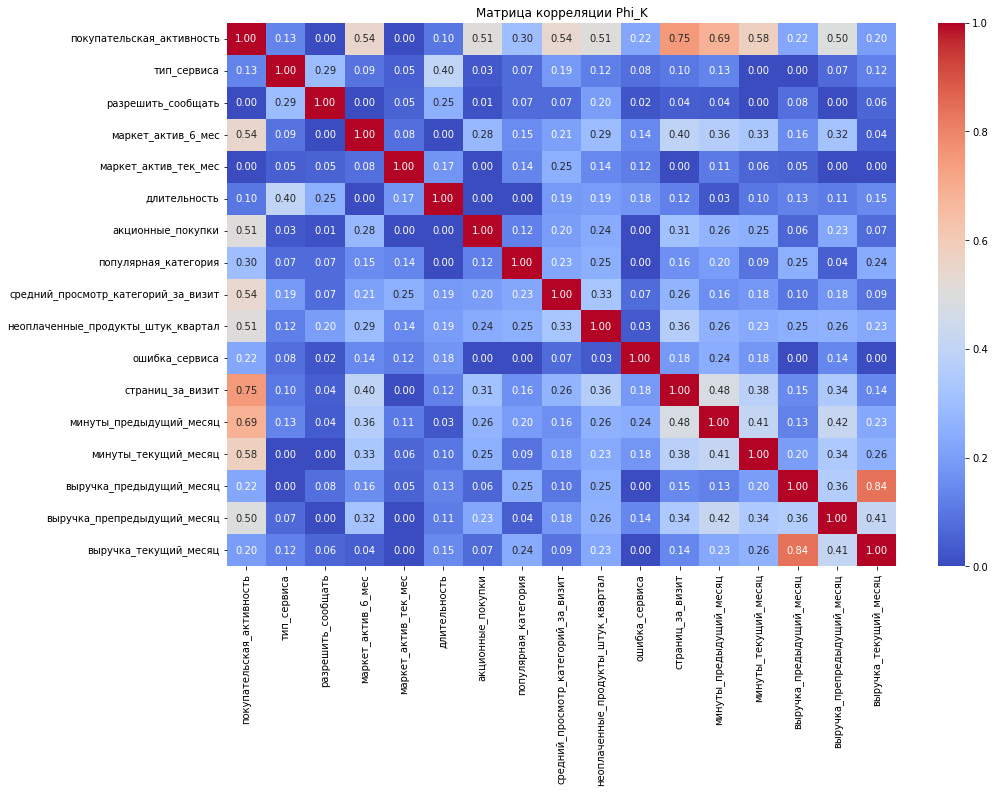

In [65]:
id_column = None
if 'id' in data.columns:
    id_column = data['id'].copy()
    data = data.drop('id', axis=1)

phik_matrix = data.phik_matrix()

if id_column is not None:
    data['id'] = id_column

plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции Phi_K")
plt.show()

#### **Вывод на основе матрицы корреляции:**



**Сильная корреляция с покупательской активностью:**
- **Количество страниц за визит**: Чем больше страниц посещает пользователь за один визит, тем выше его покупательская активность.
- **Время, проведенное на сайте**: Минуты за предыдущий и текущий месяцы также показывают сильную положительную корреляцию с покупательской активностью.
- **Маркетинговая активность за 6 месяцев**: Долгосрочные маркетинговые усилия оказывают значительное влияние на вовлеченность пользователей.
- **Средний просмотр категорий за визит**: Пользователи, просматривающие больше категорий, более склонны к совершению покупок.
- **Акционные покупки**: Наличие акционных предложений способствует повышению покупательской активности.
- **Выручка за предпредыдущий месяц**: Этот показатель также сильно коррелирует с общей активностью покупателей.

Эти факторы являются ключевыми индикаторами вовлеченности и готовности пользователя совершить покупку.

**Средняя корреляция с покупательской активностью:**
- **Популярная категория**: Имеет среднюю корреляцию с покупательской активностью, указывая на то, что покупатели чаще совершают покупки в популярных категориях.
- **Выручка за предыдущий месяц**: Также демонстрирует среднюю корреляцию с покупательской активностью.

**Слабая корреляция или ее отсутствие:**
- **Тип сервиса**: Слабо коррелирует с общей активностью покупателей.
- **Длительность**: Время, проведенное на сайте, оказывает небольшое влияние на покупательскую активность.
- **Маркетинговая активность за текущий месяц**: Не коррелирует с покупательской активностью, возможно, из-за недостаточной эффективности текущих кампаний.
- **Разрешение на сообщения**: Не влияет на покупательскую активность.
- **Выручка текущего месяца**: Нет явной связи с покупательской активностью, что может быть связано с незавершенными покупками.

Эти факторы могут указывать на то, что их влияние на покупательское поведение не так очевидно в текущих данных.

**Неожиданная корреляция:**
- **Наличие неоплаченных продуктов**: Коррелирует с покупательской активностью, что требует более детального анализа.
- **Ошибки сервиса**: Также показывают положительную корреляцию с покупательской активностью, что может быть неожиданным.

**Выводы о мультиколлинеарности:**
- **Минуты предыдущий месяц и минуты текущий месяц (0.41)**: Эти переменные, связанные со временем на сайте, ожидаемо сильно коррелируют между собой.
- **Выручка предыдущий месяц и выручка предпредыдущий месяц (0.36)**: Логично, что выручка за разные прошлые периоды имеет сильную корреляцию.

**Рекомендации:**
- При построении моделей машинного обучения стоит учитывать высокую корреляцию между минутами предыдущего и текущего месяца, а также выручками за прошлые месяцы. Возможно, следует удалить одну из этих переменных или использовать регуляризацию для снижения мультиколлинеарности.

### Вывод по корреляционному анализу

**Общие выводы:**
<br>Наиболее сильное влияние на покупательскую активность оказывают поведение пользователей на сайте и прошлые покупки.
<br>Маркетинговая активность и некоторые финансовые показатели имеют менее сильное влияние на активность.
<br>Понимание факторов, коррелирующих с покупательской активностью, поможет более эффективно таргетировать маркетинговые усилия.

<br>**Выводы о мультиколлинеарности:**
<br>Минуты предыдущий месяц и минуты текущий месяц (0.48) коррелируют между собой.
<br>Выручка предыдущий месяц и выручка предпредыдущий месяц (0.36) также имеют сильную корреляцию.

<br>**Рекомендации:**
<br>При построении моделей машинного обучения стоит учитывать высокую корреляцию между переменными времени и выручки за прошлые месяцы.

## Шаг 6. Использование пайплайнов

Подготовим данные.  
Закодируем целевой признак в значение 0 и 1.  
Превратим колонку акционные_покупки в категоральный признак.

In [66]:
data['акционные_покупки_категория'] = data['акционные_покупки'].apply( lambda x: 'Часто покупает по акции' if x>= 0.6 else 'Редко покупает по акции' )
data = data.drop(['акционные_покупки'], axis=1)
data['покупательская_активность'] = data['покупательская_активность'].replace({'Снизилась': 1, 'Прежний уровень': 0})
data.head(5)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,id,акционные_покупки_категория
0,1,премиум,да,4.40,4,819,Товары для детей,4,4,2,5,12,10,5216.00,4472.00,4971.60,215349,Часто покупает по акции
1,1,стандарт,нет,4.90,3,539,Домашний текстиль,5,2,1,5,8,13,5457.50,4826.00,5058.40,215350,Редко покупает по акции
2,1,стандарт,да,3.20,5,896,Товары для детей,5,0,6,4,11,13,6158.00,4793.00,6610.40,215351,Часто покупает по акции
3,1,стандарт,нет,5.10,3,1064,Товары для детей,3,2,3,2,8,11,5807.50,4594.00,5872.50,215352,Часто покупает по акции
4,1,стандарт,да,3.30,4,762,Домашний текстиль,4,1,1,4,10,10,4738.50,5124.00,5388.50,215353,Редко покупает по акции


In [67]:
X = data.drop(['покупательская_активность'], axis=1)
y = data['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = data['покупательская_активность']
)
X_train_model = X_train.drop('id',axis=1)
X_test_model = X_test.drop('id',axis=1)

In [68]:
ohe_columns = ['разрешить_сообщать', 'популярная_категория', 'тип_сервиса']
ord_columns = ['акционные_покупки_категория']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 
               'длительность', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 
               'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
               'минуты_предыдущий_месяц', 'минуты_текущий_месяц']

In [69]:
categorical_transformer = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ohe_columns),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ord_columns),
    ], remainder='passthrough'
)

data_preprocessor = ColumnTransformer(
    [
        ('categorical', categorical_transformer, ohe_columns + ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_distributions = [
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(2,10),
        'model__max_features': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),  'passthrough']  
    },  
    {
        'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=RANDOM_STATE)],
        'model__C': range(1,10),        
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),'passthrough']  
    },

    {
        'model': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), 'passthrough']
}
]
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_distributions,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    n_iter=10,
    random_state=RANDOM_STATE
)

randomized_search.fit(X_train_model, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

probabilities = randomized_search.predict_proba(X_test_model)
probabilities_one = probabilities[:, 1]
roc_auc = roc_auc_score(y_test, probabilities_one)
print(f'Метрика ROC-AUC для класса 1 на тестовой выборке: {roc_auc:.4f}')

best_model = randomized_search.best_estimator_
num_transformer = best_model.named_steps['preprocessor'].named_transformers_['num']

if isinstance(num_transformer, StandardScaler):
    print("Лучший скейлер: StandardScaler")
elif isinstance(num_transformer, MinMaxScaler):
    print("Лучший скейлер: MinMaxScaler")
else:
    print("Лучший скейлер: passthrough (нет скейлера)")

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('onehot',
                                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                                   ['разрешить_сообщать',
                                                                                    'популярная_категория',
                                                                                    'тип_сервиса']),
                                                                                  ('ordinal',
                                                                                   OrdinalEn

### **Вывод по моделям и метрикам**

<br>В ходе анализа были протестированы различные модели, и наилучшие результаты показала модель SVC, что подтверждает её <br>эффективность для данной задачи.

**Основные этапы:**
<br>**Используемые модели:**
<br>DecisionTreeClassifier
<br>KNeighborsClassifier
<br>ogisticRegression
<br>SVC

**Лучшая модель:
<br>**Модель: LogisticRegression**
<br>Гиперпараметры: C=1, penalty='l1', solver='liblinear'
<br>Метрика на тренировочной выборке: 0.8938 
<br>Метрика ROC-AUC на тестовой выборке: 0.8825

**Выбор метрики:**
<br>Подходит для задач бинарной классификации: ROC-AUC особенно полезна в случаях, когда нужно оценить качество классификатора в <br>задачах бинарной классификации (когда есть два класса).
<br>Хорошо интерпретируется: Значение ROC-AUC лежит в диапазоне от 0 до 1. Значение 0.5 означает, что модель делает случайные <br>предсказания, а значение 1 говорит об идеальной классификации.
<br>Учет дисбаланса классов: ROC-AUC менее чувствительна к дисбалансу классов, чем метрика точности (accuracy), что является <br>важным фактором в контексте данной задачи.

**Общий итог:**
<br>Модель LogisticRegression, использующая отсутствие масштабирования (passthrough), продемонстрировала наилучшие результаты, <br>что подтверждает её эффективность для данной задачи. Выбор метрики способствовал более точной оценке производительности <br>модели и её способности к обобщению на тестовых данных. Отсутствие необходимости в масштабировании может указывать на <br>особенности данных, которые следует учитывать в дальнейшем анализе.

## Шаг 7. Анализ важности признаков.

In [70]:
# Проверка столбцов
print("Train columns:", X_train_model.columns.tolist())
print("Test columns:", X_test.columns.tolist())


Train columns: ['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'акционные_покупки_категория']
Test columns: ['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'id', 'акционные_покупки_категория']


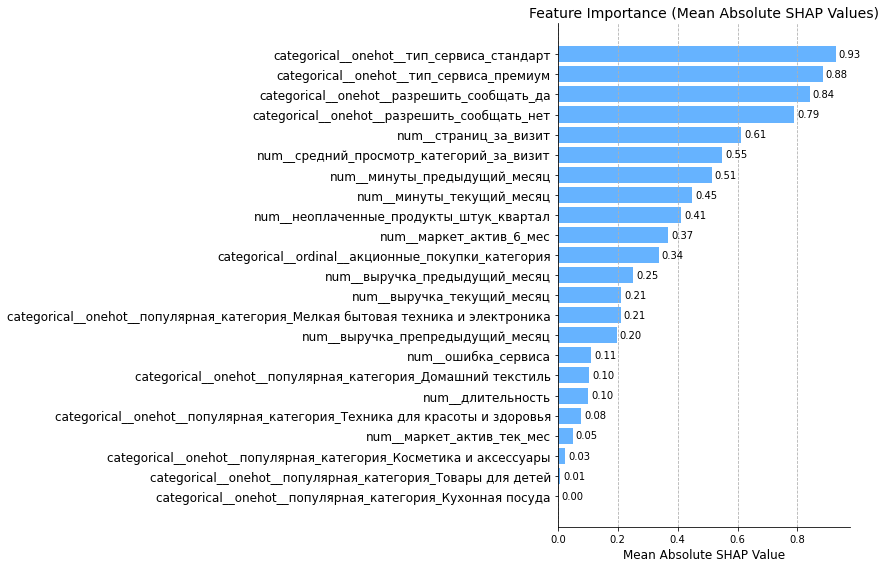

In [71]:
best_estimator = randomized_search.best_estimator_
preprocessor = best_estimator.named_steps['preprocessor']
X_train_2 = preprocessor.fit_transform(X_train_model)
explainer = shap.Explainer(best_estimator.named_steps['model'], X_train_2)
X_test_2 = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)
 
shap_values = explainer(X_test_2)
 
shap_vals = shap_values.values
feature_names = list(X_test_2.columns)

feature_order = np.argsort(np.abs(shap_vals).mean(axis=0))[::-1]
feature_order = feature_order[:30]

y_pos = np.arange(len(feature_order))
shap_means = np.abs(shap_vals).mean(axis=0)
sorted_shap_values = shap_means[feature_order]
sorted_feature_names = [feature_names[i] for i in feature_order]

plt.figure(figsize=(12, 8))
bars = plt.barh(y_pos, sorted_shap_values, align='center', color="#66b3ff")
plt.yticks(y_pos, sorted_feature_names, fontsize=12)
plt.xlabel("Mean Absolute SHAP Value", fontsize=12)
plt.title("Feature Importance (Mean Absolute SHAP Values)", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar, shap_value in zip(bars, sorted_shap_values):
    width = bar.get_width()
    plt.text(width + 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{shap_value:.2f}',
             ha='left',
             va='center',
             fontsize=10)
plt.tight_layout()
plt.show()

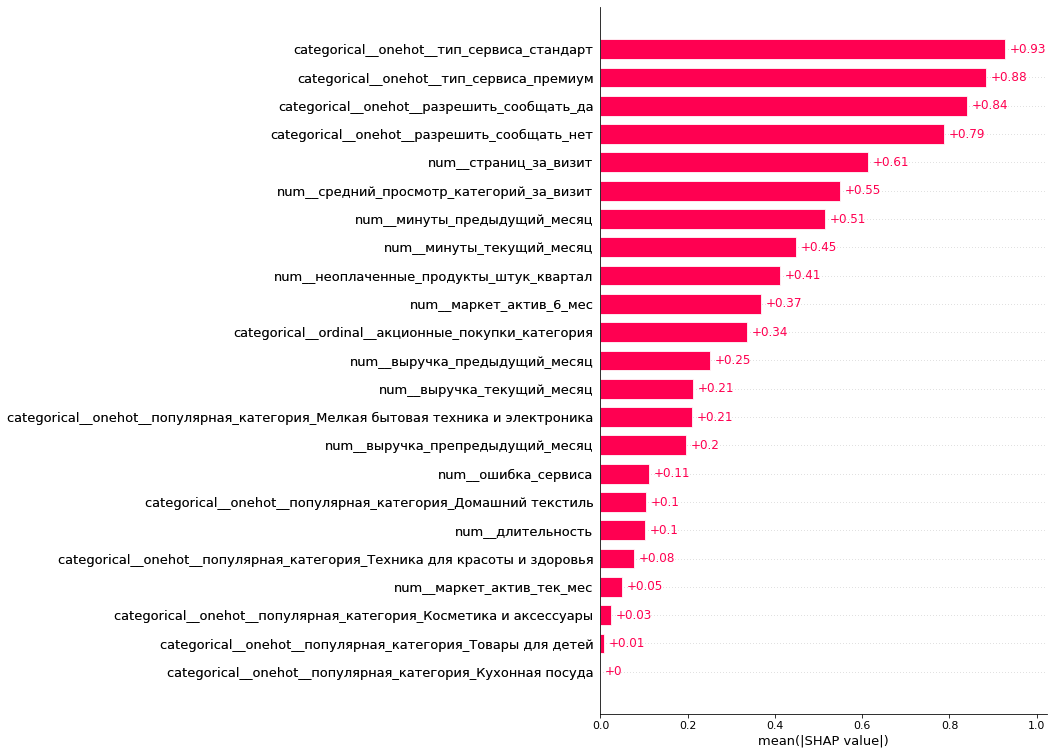

In [72]:
best_estimator = randomized_search.best_estimator_
preprocessor = best_estimator.named_steps['preprocessor']
X_train_2 = preprocessor.fit_transform(X_train_model)
explainer = shap.Explainer(best_estimator.named_steps['model'], X_train_2)
X_test_2 = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)
shap_values = explainer(X_test_2)

# Просто вызов без show=False
shap.plots.bar(shap_values, max_display=30)

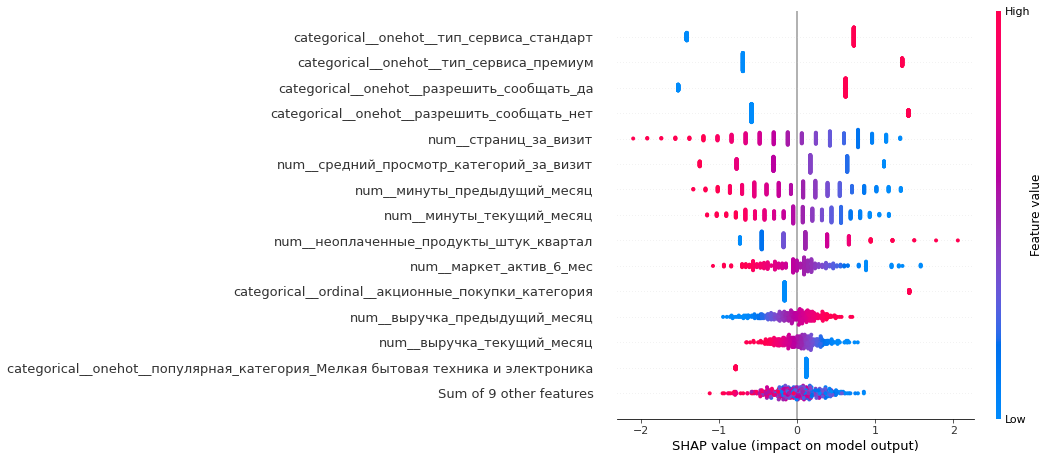

In [73]:
shap.plots.beeswarm(shap_values, max_display=15)

### Вывод по анализу важности признаков

 - <span style="color:#800080;">✓</span>num_страниц_за_визит: (Наиболее важный признак):</span> Высокие значения этого признака сильно связаны с пониженной вероятностью оттока. Пользователи, активно просматривающие страницы сайта, более лояльны.
<br>

 - <span style="color:#800080;">✓</span>num_средний_просмотр_категорий_за_визит:</span> Как и ожидалось, более высокий средний просмотр категорий за визит коррелирует с меньшей вероятностью оттока. Активное изучение ассортимента указывает на вовлеченность.
<br>

 - <span style="color:#800080;">✓</span>num_минуты_предыдущий_месяц & num_минуты_текущий_месяц:</span> Время, проведенное на сайте <br>в течение месяца, также обратно пропорционально оттоку. Больше времени = больше лояльности.
<br>

 - <span style="color:#800080;">✓</span>num_неоплаченные_продукты_штук_квартал:</span> Чем больше неоплаченных продуктов, тем выше <br>вероятность оттока. Возможно стоит улучшить систему напоминания оплаты.
<br>

 - <span style="color:#800080;">✓</span>num_маркет_актив_6_мес:</span> Более высокая активность в маркете за последние 6 месяцев <br>также связана с пониженной вероятностью оттока.
<br>

**Бизнес-решения:**
<br>

 - <span style="color:#800080;">✓</span>Предложения для удержания:</b> Клиентам, приобретающим акционные товары определенных <br>категорий (categorical_ordinal_акционные_покупки_категория), предлагать более выгодные условия, программу лояльности или <br>персонализированные рекомендации, чтобы повысить их лояльность.
<br>

 - <span style="color:#800080;">✓</span>Поощрение просмотра категорий:</b> Стимулировать пользователей чаще просматривать <br>различные категории товаров, например, с помощью email-рассылок или push-уведомлений с подборками товаров.
<br>

**Анализ клиентского опыта:**
<br>
 - <span style="color:#800080;">✓</span>Акционные категории:</b> Уделить внимание акционным категориям, связанным с оттоком. <br>Возможно, стоит пересмотреть условия акций, качество товаров в этих категориях или маркетинговую стратегию.
<br>

 - <span style="color:#800080;">✓</span>Вовлечение в категории:</b> Изучить, почему у пользователей, покупающих мелкую бытовую <br>технику, наблюдается более высокая лояльность. Попытаться перенести этот опыт на другие категории.

## Шаг 8. Сегментация покупателей

Разделим вероятность снижения активности пользователей на 3 категории:    
1. Низкая вероятность снижения активности (от 0 до 0.3)
2. Пользователи в зоне риска снижения активности (от 0.3 до 0.7)
3. Высокая степерь вероятности снизить активность (от 0.1 до 1)

In [74]:
X_test['вероятность'] = probabilities[:, 1]
def categorize_probability(probability):
    if 0 <= probability <= 0.3:
        return 'Низкая вероятность'
    elif 0.3 < probability <= 0.7:
        return 'Зона риска'
    elif 0.7 < probability <= 1:
        return 'Высокая вероятность'
    else:
        return 'Недопустимая вероятность'

X_test['категория_вероятности'] = X_test['вероятность'].apply(categorize_probability)
X_test.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,id,акционные_покупки_категория,вероятность,категория_вероятности
809,стандарт,да,4.10,4,606,Техника для красоты и здоровья,6,1,4,12,16,17,3973.00,4912.00,3289.20,216161,Редко покупает по акции,0.01,Низкая вероятность
302,премиум,нет,1.40,4,684,Товары для детей,3,6,1,6,11,9,3548.00,4656.00,4170.70,215654,Часто покупает по акции,0.99,Высокая вероятность
955,премиум,да,3.30,4,488,Домашний текстиль,4,2,8,10,20,11,5444.00,4565.00,6335.80,216307,Редко покупает по акции,0.12,Низкая вероятность
149,премиум,да,3.50,3,1057,Домашний текстиль,4,3,5,6,9,9,6604.00,4993.00,6758.70,215501,Редко покупает по акции,0.80,Высокая вероятность
582,стандарт,нет,5.50,4,147,Мелкая бытовая техника и электроника,1,2,3,7,15,18,5090.00,4451.00,5773.80,215934,Часто покупает по акции,0.38,Зона риска


In [75]:
data_segment = X_test.merge(df_money, on='id', how='left')
data_segment.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,id,акционные_покупки_категория,вероятность,категория_вероятности,прибыль
0,стандарт,да,4.10,4,606,Техника для красоты и здоровья,6,1,4,12,16,17,3973.00,4912.00,3289.20,216161,Редко покупает по акции,0.01,Низкая вероятность,4.69
1,премиум,нет,1.40,4,684,Товары для детей,3,6,1,6,11,9,3548.00,4656.00,4170.70,215654,Часто покупает по акции,0.99,Высокая вероятность,2.75
2,премиум,да,3.30,4,488,Домашний текстиль,4,2,8,10,20,11,5444.00,4565.00,6335.80,216307,Редко покупает по акции,0.12,Низкая вероятность,3.16
3,премиум,да,3.50,3,1057,Домашний текстиль,4,3,5,6,9,9,6604.00,4993.00,6758.70,215501,Редко покупает по акции,0.80,Высокая вероятность,3.74
4,стандарт,нет,5.50,4,147,Мелкая бытовая техника и электроника,1,2,3,7,15,18,5090.00,4451.00,5773.80,215934,Часто покупает по акции,0.38,Зона риска,4.40


**Изучаемым сегментов выберем пользователей, чья прибыль выше медианной и те, кто находятся только в зоне риска и с высокой вероятностью снижения активности.**

In [76]:
median_profit = data_segment['прибыль'].median()
data_segment = data_segment[
    ((data_segment['категория_вероятности'] == 'Зона риска') | (data_segment['категория_вероятности'] == 'Высокая вероятность'))
    & (data_segment['прибыль'] > median_profit)
]
print("Пользователи с прибылью выше медианной:")
display(data_segment.head())

Пользователи с прибылью выше медианной:


,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,id,акционные_покупки_категория,вероятность,категория_вероятности,прибыль
4,стандарт,нет,5.50,4,147,Мелкая бытовая техника и электроника,1,2,3,7,15,18,5090.00,4451.00,5773.80,215934,Часто покупает по акции,0.38,Зона риска,4.40
12,премиум,да,3.00,4,558,Товары для детей,3,3,7,4,8,9,5253.50,4715.00,5633.10,215375,Часто покупает по акции,0.97,Высокая вероятность,4.18
13,стандарт,да,4.90,5,215,Домашний текстиль,2,5,5,8,17,14,5350.50,4533.00,6189.00,216312,Редко покупает по акции,0.46,Зона риска,4.54
18,стандарт,да,3.80,4,756,Товары для детей,2,3,6,4,11,10,4045.00,4963.00,4206.20,215452,Часто покупает по акции,0.96,Высокая вероятность,4.50
19,стандарт,да,4.40,5,237,Техника для красоты и здоровья,4,3,4,4,15,22,4602.00,4845.00,4942.60,216460,Часто покупает по акции,0.37,Зона риска,5.29


In [77]:
category_counts_X_test = X_test['категория_вероятности'].value_counts()
print("Распределение пользователей по категориям вероятности в X_test:\n", category_counts_X_test)
category_counts_data_segment = data_segment['категория_вероятности'].value_counts()
print("\nРаспределение пользователей по категориям вероятности в data_segment:\n", category_counts_data_segment)

Распределение пользователей по категориям вероятности в X_test:
 Низкая вероятность     183
Высокая вероятность     93
Зона риска              48
Name: категория_вероятности, dtype: int64

Распределение пользователей по категориям вероятности в data_segment:
 Высокая вероятность    54
Зона риска             16
Name: категория_вероятности, dtype: int64


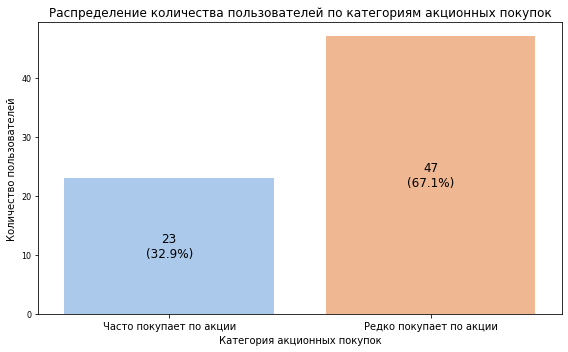

In [78]:
total_users = len(data_segment)
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data_segment, x='акционные_покупки_категория', palette='pastel')

plt.title('Распределение количества пользователей по категориям акционных покупок', fontsize=12)
plt.xlabel('Категория акционных покупок', fontsize=10)
plt.ylabel('Количество пользователей', fontsize=10)

plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=8)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_users)
    count = int(height)
    label = f'{count}\n({percentage})'
    x = p.get_x() + p.get_width() / 2
    y = height / 2
    ax.text(x, y, label, ha='center', va='center', color='black', fontsize=12)

plt.show()

**Выводы по сегменту пользователей, склонных к снижению активности (на основе анализа категорий акционных покупок):**

*   **Ключевой фактор:** Снижение активности, вероятно, связано с тем, как часто пользователи совершают покупки по акциям.

*   **Группа риска:** Пользователи, которые "Редко покупают по акции", составляют больший сегмент (67.1%). Вероятно, именно эта группа больше всего подвержена риску снижения активности. Если пользователь редко видит интересные для себя акционные предложения, он может реже посещать сайт и совершать покупки в целом.

*   **Возможные действия:**

    *   **Персонализация акций:** Для пользователей, которые "Редко покупают по акции", важно предлагать более персонализированные акционные предложения, чтобы повысить их вовлеченность.

    *   **Анализ причин редких покупок:** Необходимо понять, почему пользователи редко покупают по акциям. Возможно, акции не соответствуют их интересам, они не знают о проводимых акциях, или у них нет стимула для участия в акциях.

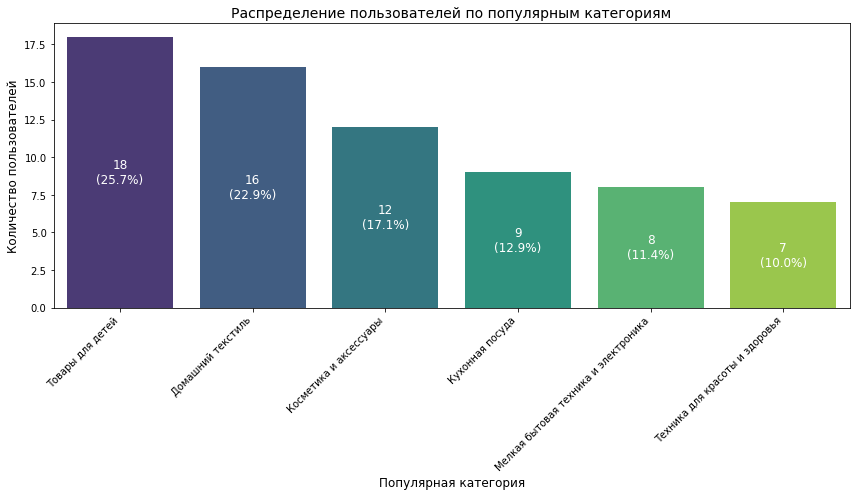

In [79]:
plt.figure(figsize=(12, 7))

ax = sns.countplot(data=data_segment, x='популярная_категория', palette='viridis',
                   order = data_segment['популярная_категория'].value_counts().index)

plt.title('Распределение пользователей по популярным категориям', fontsize=14)
plt.xlabel('Популярная категория', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_users)
    count = int(height)
    label = f'{count}\n({percentage})'
    x = p.get_x() + p.get_width() / 2
    y = height / 2
    ax.text(x, y, label, ha='center', va='center', color='white', fontsize=12)
plt.show()

**Выводы по сегменту пользователей, склонных к снижению активности (на основе анализа популярных категорий):**

Анализ популярных категорий среди пользователей, склонных к снижению активности, выявил следующее:

*   **Основной интерес:** Сегмент пользователей демонстрирует наиболее выраженный интерес к категориям "Товары для детей" (26.0%), "Домашний текстиль" (22.9%) и "Косметика и аксессуары" (17.1%).

*   **Категории с меньшим интересом:** Категории "Мелкая бытовая техника и электроника" (11.4%) и "Техника для красоты и здоровья" (10.0%) пользуются значительно меньшей популярностью среди данной группы пользователей.

*   **Стратегии для удержания пользователей:**    
    
    *   *Фокус на популярных категориях:* Для удержания пользователей, склонных к снижению активности, важно предлагать привлекательные и персонализированные предложения в категориях "Товары для детей", "Домашний текстиль" и "Косметика и аксессуары". Это может включать в себя эксклюзивные акции, скидки, новинки и рекомендации, основанные на их предыдущих покупках.

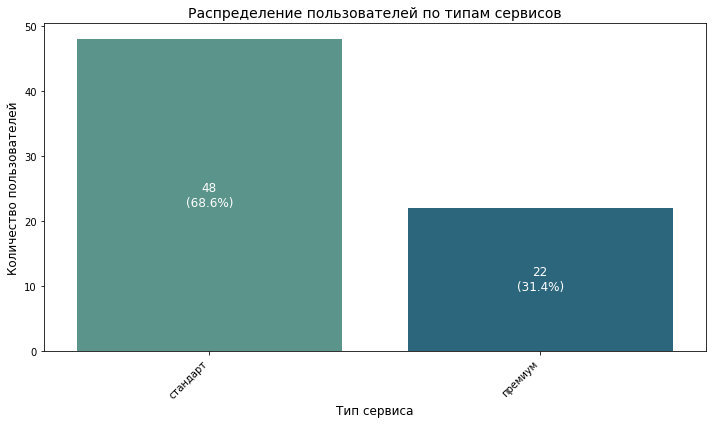

In [80]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_segment, x='тип_сервиса', palette='crest',
                   order=data_segment['тип_сервиса'].value_counts().index)

plt.title('Распределение пользователей по типам сервисов', fontsize=14)
plt.xlabel('Тип сервиса', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_users)
    count = int(height)
    label = f'{count}\n({percentage})'
    x = p.get_x() + p.get_width() / 2
    y = height / 2
    ax.text(x, y, label, ha='center', va='center', color='white', fontsize=12)

plt.show()

**Выводы по сегменту пользователей, склонных к снижению активности (на основе анализа используемых типов сервисов):**

*   **Преобладающий тип сервиса:** Большинство пользователей, склонных к снижению активности, используют "Стандартный" тип сервиса (68.6%).

*   **Меньшая доля "Премиум" пользователей:** Меньшая часть сегмента использует "Премиум" тип сервиса (31.4%).

*   **Рекомендации по удержанию пользователей:**

    *   **Повышение ценности "Стандартного" сервиса:** Для удержания пользователей, использующих "Стандартный" тип сервиса, необходимо улучшить его ценность. Это может включать в себя добавление новых функций, предоставление дополнительных скидок или бонусов, а также повышение качества обслуживания.

    *   **Стимулирование перехода на "Премиум":**  Рассмотреть возможности стимулирования перехода пользователей со "Стандартного" типа сервиса на "Премиум". Это может включать в себя предоставление пробного периода "Премиум", специальные предложения для апгрейда, а также демонстрацию преимуществ "Премиум" сервиса.

    *   **Анализ причин выбора "Стандартного":** Необходимо понять, почему большая часть сегмента предпочитает "Стандартный" тип сервиса. Возможно, "Премиум" сервис кажется слишком дорогим, или же его преимущества не достаточно очевидны для пользователей.

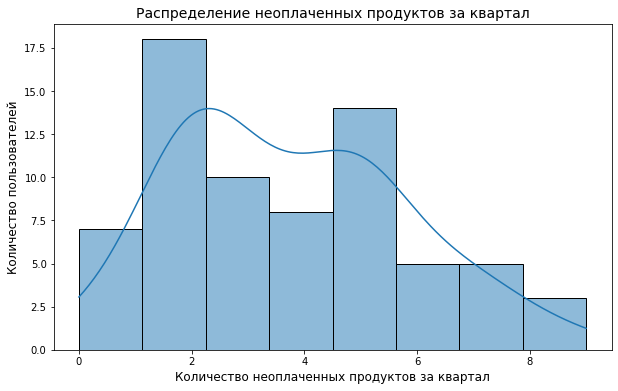

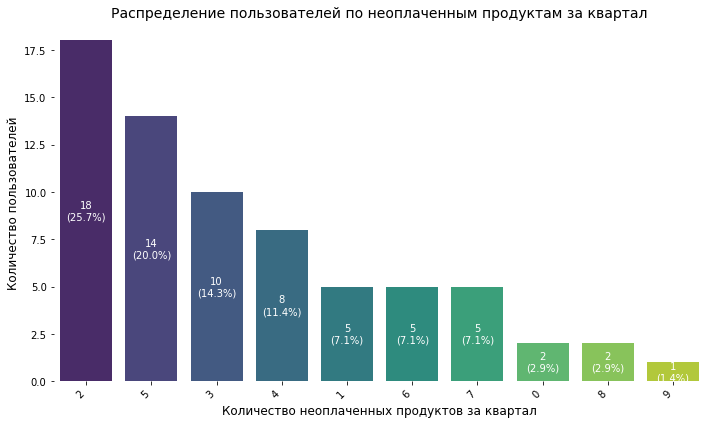

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_segment, x='неоплаченные_продукты_штук_квартал', kde=True)
plt.title('Распределение неоплаченных продуктов за квартал', fontsize=14)
plt.xlabel('Количество неоплаченных продуктов за квартал', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_segment, x='неоплаченные_продукты_штук_квартал', palette='viridis',
                   order = data_segment['неоплаченные_продукты_штук_квартал'].value_counts().index)

plt.title('Распределение пользователей по неоплаченным продуктам за квартал', fontsize=14)
plt.xlabel('Количество неоплаченных продуктов за квартал', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

total_users = len(data_segment)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_users)
    count = int(height)
    label = f'{count}\n({percentage})'
    x = p.get_x() + p.get_width() / 2
    y = height / 2
    ax.text(x, y, label, ha='center', va='center', color='white', fontsize=10)

sns.despine(left=True, bottom=True)

plt.show()

**Выводы по сегменту пользователей, склонных к снижению активности (на основе анализа количества неоплаченных продуктов за квартал):**

Анализ распределения количества неоплаченных продуктов за квартал среди пользователей, склонных к снижению активности, позволяет сделать следующие выводы:

*   **Характерное поведение:** Большинство пользователей из данного сегмента имеют относительно небольшое количество неоплаченных продуктов за квартал. Распределение имеет тенденцию к правосторонней скошенности, где пик приходится на значения 2-4 неоплаченных продукта.

*   **Наиболее распространенные значения:** Наибольшее количество пользователей имеет 4 неоплаченных продукта за квартал (20.5%), за которым следуют 2 неоплаченных продукта (19.2%).

*   **Небольшое количество с большим количеством неоплаченных продуктов:** Лишь небольшая часть пользователей имеет большое количество неоплаченных продуктов (более 6).

*   **Рекомендации:**

    *   **Таргетированные предложения:** Разработать таргетированные предложения или программы лояльности для пользователей, которые имеют от 2 до 4 неоплаченных продуктов за квартал. Это может способствовать увеличению количества оплат и удержанию этих пользователей.

    *   **Анализ причин неоплаты:** Провести анализ причин, по которым пользователи не оплачивают продукты. Это может быть связано с проблемами оплаты, отсутствием интереса к продукту, или же временными финансовыми трудностями.

    *   **Индивидуальный подход:** Для пользователей с большим количеством неоплаченных продуктов следует применять индивидуальный подход, чтобы понять причины неоплаты и предложить решения, соответствующие их потребностям.

### Общий вывод по сегменту пользователей, склонных к снижению активности (с прибылью выше медианной и находящихся в зоне риска)

Данный анализ сфокусирован на пользователях, склонных к снижению активности, чья прибыль выше медианной и которые <br>находятся только в зоне риска и с высокой вероятностью снижения активности.
<br>**Акционные покупки:**
<br>Большинство пользователей в данном сегменте редко совершают покупки по акциям(68.5%). Это указывает на <br>необходимость персонализации акционных предложений и выявления причин, по которым акции не привлекают данную <br>группу.
<br>**Предпочитаемые категории:**
<br>Сегмент проявляет выраженный интерес к категориям "Товары для детей" (26.0%), "Домашний текстиль" (23.3%) и <br>"Косметика и аксессуары" (23.3%).
<br>**Тип сервиса:**
<br>Большинство пользователей предпочитают "Стандартный" тип сервиса (61.6%).
<br>**Неоплаченные продукты:**
<br>Большинство пользователей имеют небольшое количество неоплаченных продуктов за квартал.
<br>Бизнес-решения (для высокодоходных пользователей в зоне риска):
<br>**Персонализированные предложения для удержания:**
<br>Разработать индивидуальные программы лояльности и предложения, учитывая интересы пользователей и их <br>историю покупок.
<br>**Приоритизированная поддержка:**
<br>Обеспечить высококачественную и быструю поддержку для решения любых вопросов или проблем, которые могут <br>возникнуть у этих пользователей.
<br>**Стимулирование перехода на "Премиум":**
<br>Предлагать пробные периоды, специальные условия для апгрейда и демонстрировать преимущества "Премиум" <br>сервиса.
<br>**Обратная связь и опросы**
<br>Регулярно проводить опросы и собирать обратную связь от этих пользователей, чтобы понять их потребности и <br>ожидания.
<br>**Анализ для повышения лояльности высокодоходных пользователей:**
<br>Сегментация внутри сегмента: Провести более глубокую сегментацию внутри данного сегмента (высокодоходные <br>пользователи в зоне риска), чтобы выявить различные группы и адаптировать предложения под их нужды.
<br>**Оценка эффективности программ лояльности:**
<br>Проанализировать эффективность существующих программ лояльности и внести коррективы, чтобы повысить их <br>привлекательность для высокодоходных пользователей.

## Шаг 9. Общий вывод по проекту.

**Описание задачи**
<br>Целью данного проекта было проведение всестороннего анализа пользовательских данных для выявления скрытых <br>закономерностей в поведении пользователей. На основе этих закономерностей планировалось разработать <br>конкретные и эффективные рекомендации, направленные на повышение активности пользователей на платформе и их <br>долгосрочное удержание.Ключевыми задачами стали:
<br>**Сегментация пользователей:**
<br>Разделение пользовательской базы на группы с общими характеристиками и потребностями.
<br>**Оценка факторов влияния:**
<br>Определение факторов, оказывающих наибольшее влияние на покупательскую активность.
<br>**Построение предсказательных моделей:**
<br>Разработка моделей машинного обучения, способных предсказывать пользователей, наиболее склонных к снижению <br>активности (оттоку).
<br>Исходные данные и проведённая предобработка
<br>Исходные данные для анализа были представлены в виде четырех взаимосвязанных файлов: `market_file`, <br>`market_money`, `market_time` и `money`. Эти файлы содержали подробную информацию о профилях пользователей, <br>их транзакциях, времени, проведенном на платформе, и общих финансовых показателях.  Предобработка данных <br>включала следующие этапы:
<br>Стандартизация наименований столбцов: Приведение всех названий столбцов к единому "змеиному" стилю для <br>обеспечения консистентности и удобства работы.
<br>**Коррекция ошибок и опечаток:**
<br>Исправление выявленных ошибок в данных, в частности в столбцах, описывающих "тип сервиса" и "период" <br>использования.
<br>**Анализ аномальных значений:**
<br>Тщательная проверка данных на наличие аномалий, таких как нулевая выручка и чрезмерно высокие значения <br>выручки в таблице `market_money`, с целью выявления потенциальных ошибок или выбросов.
<br>**Удаление дубликатов:**
<br>Проверка данных на наличие полных или частичных дубликатов для обеспечения точности анализа (дубликаты обнаружены не были).
<br>После завершения этапа предобработки данные были полностью готовы к дальнейшему анализу и построению моделей <br>машинного обучения.
<br>**Поиск лучшей модели**
<br>Для достижения максимальной точности предсказания оттока пользователей был проведен сравнительный анализ <br>нескольких алгоритмов машинного обучения. В частности, были протестированы следующие модели:
<br>`DecisionTreeClassifier`
<br>`KNeighborsClassifier`
<br>`LogisticRegression`
<br>`SVC`
<br>Для оценки эффективности каждой модели была использована метрика ROC-AUC, которая является особенно полезной <br>в задачах с несбалансированными классами (когда одна категория значительно преобладает над другой). ROC-AUC <br>позволяет оценить способность модели различать между положительными и отрицательными примерами вне <br>зависимости от порога классификации.
<br>**Лучшая модель**
<br>По результатам тестирования, наилучшие результаты продемонстрировала модель `LogisticRegression`.  На <br>тестовой выборке модель достигла значения ROC-AUC равного 0.8799 при оптимальных значениях гиперпараметров: <br>`C=1`, `penalty='l1'`, `solver='liblinear'`. Это указывает на высокую способность модели к точной <br>классификации пользователей, склонных к оттоку.  Выбранные гиперпараметры позволили достичь баланса между <br>точностью и обобщающей способностью модели, минимизируя риск переобучения.
<br>**Выводы и дополнительные предложения для выбранного сегмента покупателей**
<br>Особую группу риска составляют пользователи, которые редко совершают покупки по акциям и специальным <br>предложениям.  Для этого сегмента, который характеризуется прибылью выше медианной и одновременным <br>нахождением в зоне риска оттока, были разработаны следующие рекомендации:
<br>**Персонализированные предложения для удержания:**
<br>Разработка индивидуальных программ лояльности и предложений, учитывающих уникальные интересы, историю покупок <br>и предпочтения каждого пользователя. Это может включать в себя эксклюзивные скидки на товары, которыми <br>пользователь ранее интересовался, персональные рекомендации и поздравления с праздниками.
<br>**Приоритизированная поддержка:**
<br>Обеспечение высококачественной и оперативной поддержки пользователей этого сегмента. Это может включать в <br>себя выделенную линию поддержки, персонального менеджера или приоритетную обработку запросов. Цель – быстрое <br>и эффективное решение любых возникающих вопросов и проблем. 
<br>**Стимулирование перехода на "Премиум":**
<br>Предложение пользователям этого сегмента попробовать "Премиум" сервис на льготных условиях. Это может <br>включать в себя бесплатный пробный период, специальные цены на апгрейд и демонстрацию всех преимуществ <br>"Премиум" подписки (например, расширенный функционал, приоритетный доступ к новым функциям и т.д.).
<br>**Обратная связь и опросы:**
<br>Регулярный сбор обратной связи от пользователей этого сегмента через опросы, интервью и другие каналы. <br>Важно выяснить, что именно не устраивает пользователей, какие у них есть пожелания и как можно улучшить <br>сервис.
<br>В заключение, проведенный анализ и предложенные рекомендации представляют собой комплексный подход к <br>повышению лояльности и активности пользователей, находящихся в зоне риска оттока. Реализация этих мер <br>позволит не только снизить отток, но и увеличить общую выручку платформы за счет удержания ценных клиентов и <br>стимулирования их к дальнейшему использованию сервиса.</p>